# Thinking with Deep Learning

This notebook will accompany the Thinking with Deep Learning workshop.


## Introduction: Thinking with Deep Learning


# Deep Learning? Training and Taming Deep Networks



# The Expanding Universe of Deep Models

Follow along on the slides!

#	The Datome - Finding, Wrangling and Encoding Everything as Data

Follow along on the slides!


# PRACTICE: Experimenting with Model Components and Data

In practice, deep learning pipelines are often best setup with python, with the most popular underlying packages and computation systems being keras and pytorch. These packages offer a fair amount of flexibility, and many other popular domain specific packages (such as HuggingFace, notable for their wonderful suite of large language models!) are built on top of Keras or PyTorch. It is ideal to have some kind of handle on how Keras and PyTorch work, because odds are if you are using some deep learning in your analysis, if not directly built using these tools, it uses them as part of its underlying computation in one or other.  

## Why Keras AND PyTorch

**Keras** is a high-level package and enables rapid plug & play. It elegantly represents the building blocks of a neural network, so we will lead with it in this section. Developed by an ex-Google engineer, its emphasis is its ability to rapidly prototype neural networks while also being integrated into the second-generation Tensorflow ecosystem (described below). Unlike other packages which might have their own computational engine, Keras runs on top of others, such as Tensorflow, Theano or MXNet. While it shines in its ability deep learning newbies to start right away, it loses points for lack of low-level flexibility.

**PyTorch** offers a lower-level approach with more flexibility, surfacing more controls for the mature user. Because we focus on the representations learned during training, we prefer PyTorch because it gives us customized control over these representations… but for a simple classification task, keras can often do the trick. We will include PyTorch examples of the same network, side-by-side, to introduce its syntax. Developed by Facebook AI, PyTorch has quickly become one of the most used and supported deep learning packages, particularly by the deep learning research community for its ease of debugging and ability to easily conjure up complex models. Deep learning frameworks require a “computational engine” to function, specifically to train deep learning models. PyTorch does this with a dynamic computational graph that uses a “define-by-run” logic, which connects all parts of a neural model in terms of the data objects passed and computations done on them. You’ll see examples of this throughout.


## Beyond Keras and Pytorch?

As mentioned before, while Keras and PyTorch are the fundamental deep learning packages, it is very possible - maybe even likely - that you write full pipelines of code using deep learning where you don't directly use these packages. For example, embeddings are often used in social science reserch, and many packages offering embeddings out of the box don't require you to interact with keras or pytorch.

However, it does pay off to know how to build basic neural networks with these two ecosystems, in the case you would need to get your hands dirty. The first part of this tutorial will have you build such a basic network for an image classification task - even if you may not directly be classifying images in your own social scientific projects, it is a classic setup and is worth well being familiar with - and indeed, paradigms such as classification are the root of more complex deep learning based approaches.

### Imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [ ]:
import sklearn.datasets
import sklearn.model_selection
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


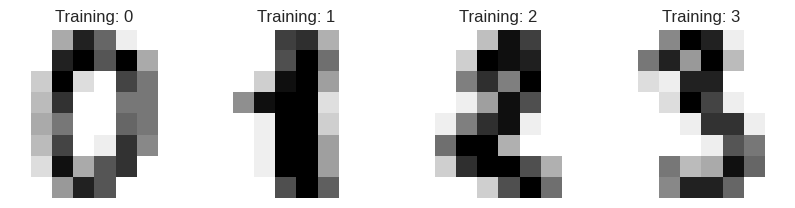

In [ ]:
digits = sklearn.datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

In [ ]:
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [ ]:
import sklearn.linear_model

In [ ]:
logreg = sklearn.linear_model.LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logreg.predict(X_test)

array([8, 6, 4, 8, 0, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 5, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       9, 9, 1, 7, 6, 8, 4, 9, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [ ]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.9299221357063404

Not terrible, but not exactly a good accuracy score. Let's now turn to neural networks with the hope that added depth can do a better job at approximating the complext function behind the data generation process. We will be using the same dataset.

### Single layer net in Keras

We will start with Keras for building a neural network. [Keras](https://keras.io/) is a very popular choice for building neural networks which have a high level of abstraction. Keras is also tightly integrated with another popular deep learning package, Tensorflow, which is the core of its computational process. One of the big advantages of Keras is how easy it is to start building a model.

In [ ]:
## Keras
import keras
import tensorflow as tf
import numpy as np

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.models import Sequential

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, which is often used for hidden layers.

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(200, input_dim=64, activation='relu'))

We then use a sigmoid activation for the last layer to make its prediction, because it is a classification problem.

For more activation functions: https://keras.io/api/layers/activations/

In [ ]:
model.add(Dense(10, activation='softmax'))

The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser.

For more losses:https://keras.io/api/losses/

For more optimisers: https://keras.io/api/optimizers/

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

The compile function configures the model for training, and we fit the model in the next line. The history variable stores information about the training process.

In [ ]:
len(X_train[0])

64

In [ ]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
29/29 [==============================] - 1s 3ms/step - loss: 2.3687 - sparse_categorical_accuracy: 0.4733
Epoch 2/200
29/29 [==============================] - 0s 8ms/step - loss: 0.3240 - sparse_categorical_accuracy: 0.9009
Epoch 3/200
29/29 [==============================] - 0s 6ms/step - loss: 0.1735 - sparse_categorical_accuracy: 0.9543
Epoch 4/200
29/29 [==============================] - 0s 7ms/step - loss: 0.1167 - sparse_categorical_accuracy: 0.9677
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9811
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9889
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9922
Epoch 8/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9955
Epoch 9/200
29/29 [==============================] - 0s 

In [ ]:
preds = model.predict(X_test)

29/29 [==============================] - 0s 1ms/step


In [ ]:
y_classes = preds.argmax(axis=-1)

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.9477196885428254

We see our model performs... just as well, or a little worse (depending on the random init!). Because we are not dealing with a massive dataset, logistic regression and a single layer neural network perform about just about the same. What should be noted here is how easily we could use Keras to build a single layer neural network.

### Single Layer Net in PyTorch

[PyTorch](https://pytorch.org/) is another widely used deep learning package, and one with high usage in both academia and industry. While Keras slotted in easily as an extension of the machine learning topics we saw yesterday (such as with its use of numpy, and the fit function), PyTorch runs on Tensors. Tensors are essentially a multi-dimensional matrix, and operate similarly to numpy arrays.

In the following lines of code, we will quickly look at some basic tensor operations, such as generating an empty tensor, basic operations on tensors, and converting between numpy arrays and tensors. While you will not be tested on your ability to manipulate tensors, it is useful to know how to play with them. The final line of code in this section converts our previously used numpy based data to tensors.

In [ ]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

### Tensors and Data

In [ ]:
#pytorch tensors calculation
x = torch.empty(5, 3)
print(x)

tensor([[ 2.9427e-44,  0.0000e+00,  2.9427e-44],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 3.6010e+33,  2.4646e+12,  0.0000e+00],
        [ 0.0000e+00,  1.3593e-43,  0.0000e+00],
        [-2.2279e-03,  0.0000e+00,  2.8699e-34]])


torch.empty() allocates memory space for the array but does not initialize the values in this space--you get whatever uninitialized values are set to those cells in the memory!

In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2223, 0.4553, 0.0606],
        [0.4081, 0.7982, 0.2748],
        [0.8538, 0.3873, 0.1733],
        [0.9477, 0.5691, 0.6905],
        [0.3956, 0.2577, 0.0819]])


torch.rand() produces random values [0,1]

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.7348, 0.1429, 0.9895],
        [0.0695, 0.4385, 0.2764],
        [0.0674, 0.1381, 0.1620],
        [0.1274, 0.5146, 0.4176],
        [0.0921, 0.5111, 0.9144]])


In [ ]:
print(torch.add(x, y))

tensor([[0.7348, 0.1429, 0.9895],
        [0.0695, 0.4385, 0.2764],
        [0.0674, 0.1381, 0.1620],
        [0.1274, 0.5146, 0.4176],
        [0.0921, 0.5111, 0.9144]])


In [ ]:
y.add_(x) # the `_` sign at end means the operation mutates tensor y in-place
print(y)

tensor([[0.7348, 0.1429, 0.9895],
        [0.0695, 0.4385, 0.2764],
        [0.0674, 0.1381, 0.1620],
        [0.1274, 0.5146, 0.4176],
        [0.0921, 0.5111, 0.9144]])


In [ ]:
# to_remove solution
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = torch.add(a1 @ a2, a3)
print("A =", A)

A = tensor([[20, 24],
        [31, 27]])


In [ ]:
# @ and torch.matmul return a multidimensional tensor
b1 = torch.tensor([[3], [5], [7]])
b2 = torch.tensor([[2], [4], [8]])
b = b1.T @ b2
print("b =", b)

b = tensor([[82]])


In [ ]:
# dot function returns a scalar tensor
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = torch.dot(b1, b2)
print("b =", b)

b = tensor(82)


We now look at converting between tensors and numpy arrays.

In [ ]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)

tensor([2., 2., 2., 2., 2.])


In [ ]:
print(b)

[2. 2. 2. 2. 2.]


In [ ]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


We now get our training data ready.

In [ ]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).type(torch.LongTensor)

### Constructing a Neural Network with PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

[Pytorch's nn module](https://pytorch.org/docs/stable/nn.html) is the basic unit for building neural networks (or computational graphs, as it is sometimes referred to in pytroch). For example, for a hidden layer, we use the Linear layer.

In [ ]:
import torch.nn.functional as F

In [ ]:
nn.Linear(20, 20)

Linear(in_features=20, out_features=20, bias=True)

The module also includes activation functions.

In [ ]:
nn.ReLU()

ReLU()

We usually encapsulate the network by defining the hidden layers and activation functions we will be needing, which you can see in the initialisation. You can then see the forward passes the input tensor through each of the operations.

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(64, 200)
        # Output layer, 10 output for the classification
        self.output = nn.Linear(200, 10)
        # Define sigmoid activation and softmax output
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [ ]:
net = Network()

We then define the optimiser and loss function.

In [ ]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [ ]:
criterion = F.nll_loss

Unlike Keras where we hit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [ ]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()
    losses.append(loss.data.numpy())
    return losses

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_train_tensor.float()

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  2.,  ..., 14.,  0.,  0.],
        [ 0.,  1., 12.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  3.,  0.,  0.]])

In [ ]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor)

<ipython-input-42-f2dd14b8917e>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


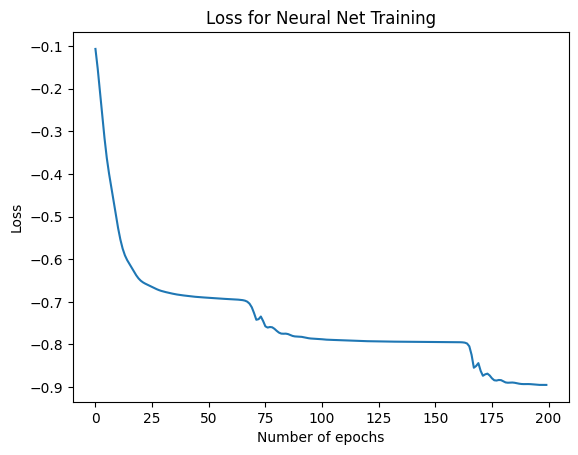

In [ ]:
plt.title("Loss for Neural Net Training")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(e_losses)
plt.show()

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [ ]:
output = net(torch.tensor(X_test).float())

<ipython-input-42-f2dd14b8917e>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [ ]:
y_classes = output.argmax(axis=-1)

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_classes)

0.8520578420467185

Cool! So our PyTorch neural net did a bit better than both Keras and logistic regression. This is a demonstration of how neural networks which are similar in structure can still end up as divergently performing models because of random weights initialisation between different libraries.

Let us now make our networks deep, and see if that helps!

### Keras Deep Net

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does! In the last example, we added each layer line by line. Here, we use a single list.

For this simple neural network, we use a virtual example based on make_classification function of sklearn package.


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(200, input_dim=64, activation='relu'),
                                 keras.layers.Dense(200, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
29/29 [==============================] - 2s 4ms/step - loss: 2.2564 - sparse_categorical_accuracy: 0.5468
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.2340 - sparse_categorical_accuracy: 0.9254
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9666
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0706 - sparse_categorical_accuracy: 0.9766
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9922
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0296 - sparse_categorical_accuracy: 0.9955
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0176 - sparse_categorical_accuracy: 1.0000
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9989
Epoch 9/200
29/29 [==============================] - 0s 

In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=1)
sklearn.metrics.accuracy_score(y_test, y_predict)

29/29 [==============================] - 0s 2ms/step


0.949944382647386

So our deep(er) Keras model does better than the single layer Keras, and matches the PyTorch deep net.


These simple examples show you the plug and play nature of such approaches, and we encourage you to experiment with your own data.

Something to note here - that as the model learns how to distinguish between the numbers, it also learns different features of the images to make that prediction, which is reflected in the weights of the neural network. It is these weights that are often later used as "embeddings".

So far though, our neural networks performance might not have quite convinced you why we should even use them! So let's fix that by quickly setting up a convolutional neural network, which kicked off the deep learning revolution, with the same dataset.

## Simple MNIST convnet

**Original Author:** [fchollet](https://twitter.com/fchollet)<br>


### Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 61s 142ms/step - loss: 0.3707 - accuracy: 0.8871 - val_loss: 0.0791 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 60s 142ms/step - loss: 0.1110 - accuracy: 0.9660 - val_loss: 0.0576 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0835 - accuracy: 0.9742 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 58s 136ms/step - loss: 0.0691 - accuracy: 0.9783 - val_loss: 0.0415 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 0.0393 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 59s 141ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 70s 166ms/step - loss: 0.0523 - accuracy: 0.9840 - val_loss: 0.0366 - val_ac

### Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026030637323856354
Test accuracy: 0.9911999702453613


#	Text Learning with Sequences & Attention


Follow along on the slides!

#	Language Learning with Large Language Models


Follow along on the slides!

#	PRACTICE: Building and Tuning Language Models

In this section we will explore how we can use out of the box language models for different text based tasks, as described in the slides and text above.

We will explore three different kinds of language models, from a shallow embedding (but widely popular!) word2vec, and two modern language models - the then transformative BERT model, and a super updated version - the GPT-4 knock off, alpaca/llama.

Note that that the alpaca and llama models use loads of RAM, which is we will not do extensive experimentation with them.

## Shallow Neural Embeddings

Word2vec, much like methods like LSA which we saw earlier, is based on theories of distributional semantics - words that appear around each other are more likely to mean similar things than words that do not appear around each other. Keeping this in mind, our job is to create a high dimensional space where these semantic relations are preserved. The innovation in word2vec is the realisation that we can use unlabelled, running text in sentences as inputs for a supervised learning algorithm--as a self-supervision task. It is supervised because we use the words in a sentence to serve as positive and negative examples. Let’s break this down:

... "use the kitchen knife to chop the vegetables"…

**C1   C2   C3   T   C4   C5   C6   C7**

Here, the target word is knife, and the context words are the ones in its immediate (6-word) window.
The first word2vec method we’ll see is called skipgram, where the task is to assign a probability for how likely it is that the context window appears around the target word. In the training process, positive examples are samples of words and their context words, and negative examples are created by sampling from pairs of words that do not appear nearby one another.

This method of implementing word2vec is called skipgram with negative sampling. So while the algorithm tries to better learn which context words are likely to appear around a target word, it ends up pushing the embedded representations for every word so that they are located optimally (e.g., with minimal semantic distortion). In this process of adjusting embedding values, the algorithm brings semantically similar words close together in the resulting high dimensional space, and dissimilar words far away.

Another word2vec training method, Continuous Bag of Words (CBOW), works in a similar fashion, and tries to predict the target word, given context. This is converse of skipgram, which tries to predict the context, given the target word. Skip-gram represents rare words and phrases well, often requiring more data for stable representations, while CBOW is several times faster to train than the skip-gram, but with slightly better accuracy for the frequent words in its prediction task. The popular gensim implementation of word2vec has both the methods included.

The code below has two examples, one for loading a pre-trained word2vec model, and one for training our own model, with an explanation of the hyperparameters.




#### Data

First, we being loading a sample corpus to play with. It is useful for us to demonstrate these examples with a dataset with text from a similar theme, but different topics, so that we have some differentiation. We will be using the hobbies dataset which comes pre-loaded with [YellowBrick](https://www.scikit-yb.org/en/latest/index.html), a python Machine Learning visualisation toolkit.

The hobbies corpus is a text corpus wrangled from the [Baleen RSS Corpus](https://github.com/DistrictDataLabs/baleen) to enable students and readers to practice different techniques in Natural Language Processing. It is structured as:

Overall:

- 7,420 paragraphs (16.562 mean paragraphs per file)

- 14,251 sentences (1.921 mean sentences per paragraph).

By Category:

- books: 72 docs, 844 paragraphs and 2,030 sentences

- cinema: 100 docs, 1,475 paragraphs and 3,047 sentences

- cooking: 30 docs, 1,190 paragraphs and 2,425 sentences

- gaming: 128 docs, 1,802 paragraphs and 3,373 sentences

- sports: 118 docs, 2,109 paragraphs and 3,376 sentences


In [ ]:
from yellowbrick.datasets import load_hobbies

In [ ]:
corpus = load_hobbies()

In [ ]:
len(corpus.data)

448

In [ ]:
corpus.data[0]

'\n\n\n        \t\t\t\tBy \n        \t\t\t\tTambay A. Obenson\n        \t\t\t\t|\n        \t\t\t\tShadow and Act\nTue Mar 08 14:54:48 EST 2016\n\n\n\n\n\n00000153-57c0-d27c-a9f3-57f140310000\n\n\n\nPELE: BIRTH OF A LEGEND, dirs. Jeff Zimbalist and Michael Zimbalist\n\n\nFinally! Three years later...\n\nThe Tribeca Film Festival has announced the complete lineups for its Spotlight, Midnight, and Special Screenings programs, as well as the 10th annual Tribeca/ESPN Film Festival, and it\'s all serious business.\n\nOf note, Imagine Entertainment\'s\xa0Pelé\xa0biopic, which will apparently be titled "Pelé: Birth of a Legend," which will make its World Premiere at the festival next month.\n\nThe film struggled to find a distributor thanks in part to reshoots and a lengthy post-production phase that caused delays (despite principal photography happening in 2013, the film was only completed just last year);\xa0also the sales company that was repping the film - Exclusive Media - imploded.\n\nTh

In [ ]:
corpus.target[0]

'cinema'

In [ ]:
corpus.data[200]

"\n\n\nMatt Slocum/Associated Press \n\n\nNew York Mets starting pitcher Jacob deGrom was removed from Friday's game against the Philadelphia Phillies due to lat tightness, per Anthony DiComo of MLB.com. It's unclear when he will return.\n\nContinue for updates.\n\n\nDeGrom Injury Not Believed to be Serious\n\nFriday, April 8\n\nDiComo added the Mets removed deGrom as a precaution.\n\nDeGrom followed up his National League Rookie of the Year campaign from 2014 with another solid year as a part of a fearsome Mets pitching rotation.\xa0\n\nThe 27-year-old went 14-8 as the Mets' No. 2 starter behind Matt Harvey and posted a 2.54 ERA with 205 strikeouts on his way to his first All-Star Game appearance.\xa0\n\nAt the Midsummer Classic in Cincinnati, he stole the show:\n\n\n\n\nVIDEO\n\n\nHe's just one of five possible starters who can throw over 95 miles per hour in the Mets rotation alongside Harvey, Noah Syndergaard, Steven Matz and Zack Wheeler, who is recovering from Tommy John surgery.

In [ ]:
corpus.target[200]

'sports'

In [ ]:
from gensim.parsing.preprocessing import preprocess_documents

In [ ]:
preprocessed_texts = preprocess_documents(corpus.data)

#### Training Word Embeddings

In the first example, we train a word2vec model on the hobbies dataset with a dimension size of 100 and window of 10, meaning the context window is 10 words. The training process goes through 10 iterations.



In [ ]:
from gensim.models import Word2Vec


Here, pre-processed texts is a file we created for our topic models, and includes stemmed words. This is a useful exercise to see how pre-processing effects word2vec models. The deeper the model the less pre-processing we need to perform because the model can be trained to perform optimal processing.

NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size".

In [ ]:
w2vmodel_cleaned = Word2Vec(
        preprocessed_texts,
        vector_size=100,
        window=10)

Let's test the model by looking up some words that we know are in the corpus and find similar words.

In [ ]:
w2vmodel_cleaned.wv.most_similar("book")

[('read', 0.999587893486023),
 ('publish', 0.9995827674865723),
 ('stori', 0.9995585680007935),
 ('comic', 0.9995302557945251),
 ('base', 0.9995220899581909),
 ('author', 0.9995074272155762),
 ('novel', 0.9994845986366272),
 ('dai', 0.9994809031486511),
 ('follow', 0.9994770288467407),
 ('illustr', 0.9994734525680542)]

In [ ]:
w2vmodel_cleaned.wv.most_similar("talk")

[('chang', 0.9998297691345215),
 ('get', 0.9998072981834412),
 ('sai', 0.9997977018356323),
 ('stand', 0.9997754096984863),
 ('friend', 0.9997667670249939),
 ('experi', 0.9997603893280029),
 ('happen', 0.999756932258606),
 ('person', 0.999754011631012),
 ('have', 0.999753475189209),
 ('mean', 0.9997522234916687)]

NOTE: it may soon become clear in the next section, but it isn't the best idea to use a corpus with stop words removed. Following from above, we lose a lot of potential relationships we can learn automatically!

We don't always need to train our own models. One of the advantages of word embedding (and many deep learning) models is using pre-trained models, where the training has already been completed on a large and/or representative corpus or document collection.

In the following lines of code we will use the gensim pre-trained models!

In [ ]:
import gensim.downloader as api

Note - downloading this can take 5-7 mins!

In [ ]:
model = api.load("word2vec-google-news-300")

In [ ]:
model.most_similar("book")

[('tome', 0.7485830783843994),
 ('books', 0.7379177808761597),
 ('memoir', 0.7302926778793335),
 ('paperback_edition', 0.6868364214897156),
 ('autobiography', 0.6741527318954468),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282975196838),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341459155082703),
 ('hardback', 0.6283079981803894)]

In [ ]:
model.most_similar("booking")

[('Booking', 0.7250384092330933),
 ('bookings', 0.7056717872619629),
 ('booked', 0.6501323580741882),
 ('bookers', 0.604210376739502),
 ('bookable', 0.5701598525047302),
 ('ticketing', 0.546725869178772),
 ('ResEze', 0.5259395837783813),
 ('www.urbtix.hk', 0.5130801200866699),
 ('Airflights.co.uk', 0.5102490186691284),
 ('aerlingus.com', 0.5025158524513245)]

In [ ]:
model.most_similar("talk")

[('talking', 0.713303804397583),
 ('talked', 0.6708846688270569),
 ('speak', 0.62212735414505),
 ('Talk', 0.5860583782196045),
 ('discuss', 0.5704180002212524),
 ('discussing', 0.522496223449707),
 ('tell', 0.5180698037147522),
 ('brag', 0.5099527835845947),
 ('complain', 0.5007246136665344),
 ('blab', 0.4967424273490906)]

Note how the most similar words make a lot more sense with the pre-trained, larger, ny times word2vec model. Also note what lemmatizing words can dramatically change the results of word2vec! Why? Because we are removing specificity in context that our model can otherwise learn. The smaller the corpus, the more useful to remove content (e.g., stem); the larger the corpus, the more useful to retain it.

Just so we have a comparison, we also create a non-cleaned corpus of the hobbies dataset on which to build an embedding model.

In [ ]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation

In [ ]:
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation]

In [ ]:
tokenized_texts = []

In [ ]:
for doc in corpus.data:
  tokenized_texts.append(preprocess_string(doc, CUSTOM_FILTERS))

In [ ]:
tokenized_texts[0][0:10]

['by', 'tambay', 'a', 'obenson', 'shadow', 'and', 'act', 'tue', 'mar', '08']

NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size"

In [ ]:
w2vmodel = Word2Vec(tokenized_texts,
        vector_size=100,
        window=10)

#### Exploring Semantics with Embeddings

So what do these vectors encapsulate? We've seen before that it is some notion of meaning, as captured by distributional semantics, with some aspect of syntactic information. How do we then use these word embeddings? Because they capture semantic information in a space that allows for semantic decomposition, a common task is to perform semantic arithmetic and analogy tasks.


Find the word that least matches the others within a word set (cosine similarity).

In [ ]:
# from keras.saving.legacy.model_config import model_from_yaml
model.doesnt_match(['books', 'books', 'novel', 'memoir', 'truck'])

'truck'

We can also perform arithmetic on vectors using the most_similar function we saw earlier. One of the more popular, earlier examples demonstrating the analogous power of word2vec models was vector['king'] - vector['man'] + vector['woman'] = vector['queen'], where the idea is that we are traversing a "gender" dimension and looking at either end of it.

Let's see how that works on our NY Times model.

In [ ]:
model.most_similar(positive=['king', 'woman'], negative = ['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

If we shift ['king'] in the direction of woman, we get to ['royal']...and almost to ['queen'] (try adding woman twice!) Interestingly, ['prince'] is a similarly effeminate royal. We can begin to see the utility of these models, even if they do capture all semantic associations as we might imagine. Larger language models capture even more sophisticated relationships.

In the rest of this section we will see other ways in which we can use and explore word embeddings.

#### Visualising Word Embeddings

Most methods involving visualising word embeddings involve projecting words into a lower dimensional space and seeing which words appear nearby one another.

See this [example by TTIC](https://home.ttic.edu/~kgimpel/wordembviz/wordembviz.html) which visualises different sets of word embeddings, using t-SNE.

The code below gives you an idea of how you might do it yourself.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
numWords = 50

In [ ]:
targetWords = model.index_to_key[350: 350 + numWords]
# targetWords = ["American", "Chinese", "Scottish", "Japanese", "English",
#                "hamburger", "cocktail", "dinner",
#                "energy", "wind", "water", "river", "windmill",
#                 "literature", "books", "author", "pages"]

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.06054688, -0.01293945, -0.10888672, ...,  0.08496094,
         0.16015625, -0.09130859],
       [ 0.04296875, -0.01306152,  0.0703125 , ...,  0.13378906,
         0.03222656, -0.15039062],
       [-0.08056641, -0.01281738,  0.14355469, ...,  0.04638672,
        -0.02685547, -0.16503906],
       ...,
       [ 0.02685547, -0.07617188,  0.02697754, ..., -0.01647949,
        -0.21972656,  0.07568359],
       [-0.00320435, -0.07080078,  0.08984375, ...,  0.08349609,
        -0.06152344, -0.14746094],
       [ 0.13476562, -0.08691406, -0.00946045, ..., -0.11523438,
        -0.06738281,  0.0703125 ]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words. We also recommend exploring UMAP, which allows projections to any arbitrary number of dimensions.

In [ ]:
import sklearn.decomposition
import sklearn.manifold

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

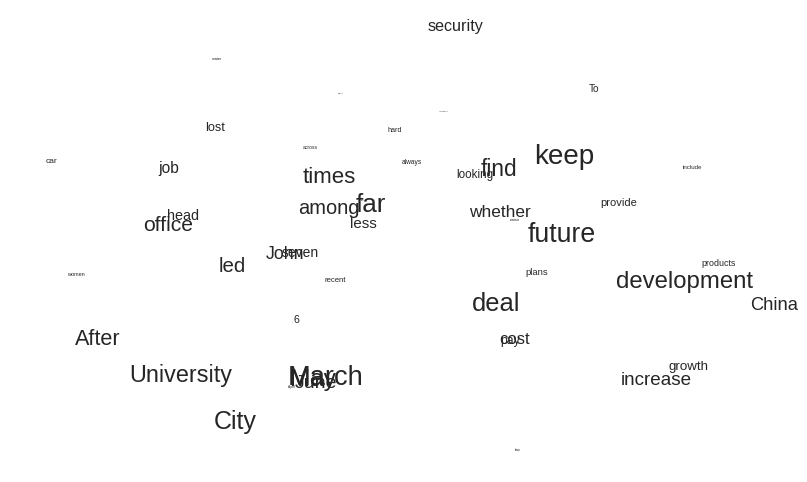

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Note how the TTIC projection was a lot more satisfactory because it projected related but differentiated words. Our example plots seemingly random words. We encourage that you try this example again with a curated list of words and see how the visualisation improves!

#### Projecting Embeddings on Dimensions of Social Analysis

We can see how word2vec does remarkably well in capturing certain aspects of semantics! Word embeddings have a lot of utility outside of just looking at relations between words, though. Because words derive their meanings from various social characteristics and dimensions, it is possible for us to project word vectors onto word-defined dimensions to see where they lie. We can create these dimensions by choosing words which that might anchor the dimension and then project other words onto this dimension. For example, if we were trying to find a gender dimension, we might make a vector between the words he, him, man and she, her, woman, and so on. Then, with a cosine projection, we can get a value of where our word of choice might lie on this dimension, revealing to us how “gendered” the word is. The following snippets of code implements this for various such dimensions. Using such a technique for social scientific analysis as described by Kozlowski et al 2019; it can be very easily extended for many business and analytical solutions.


First we can visualize with dimension reduction

In [ ]:
import pandas

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

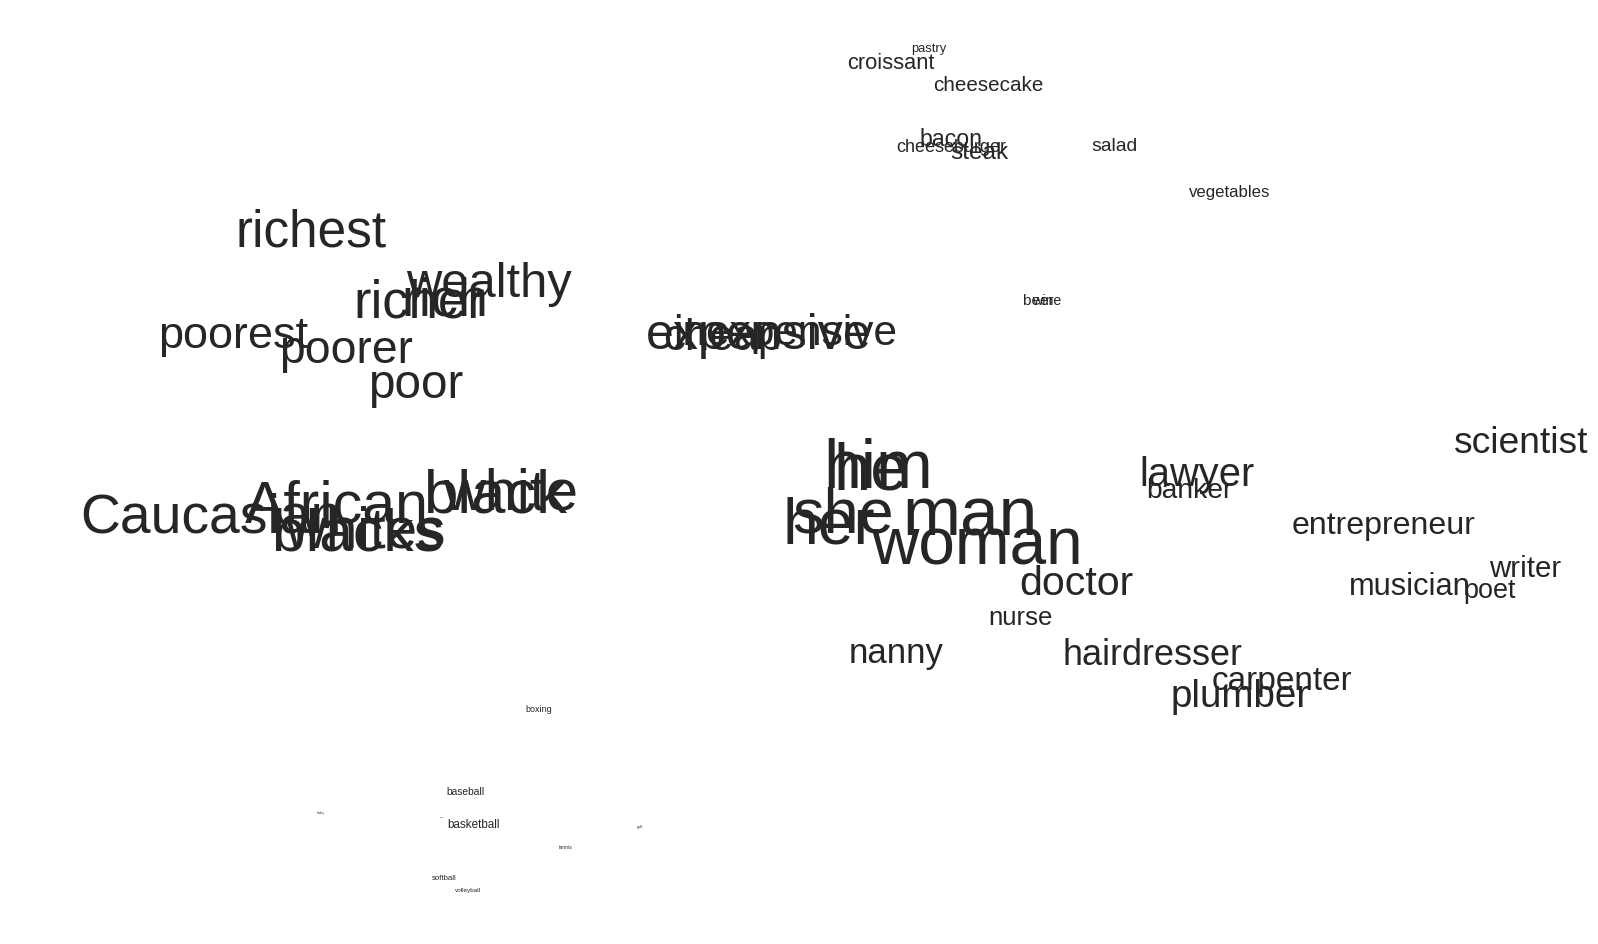

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0) #Making the points invisible

for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))

plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(model, Occupations)
Fooddf = makeDF(model, Foods)
Sportsdf = makeDF(model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

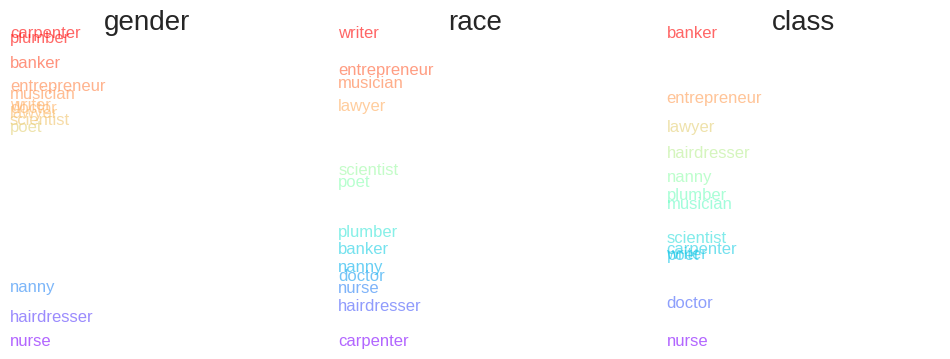

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

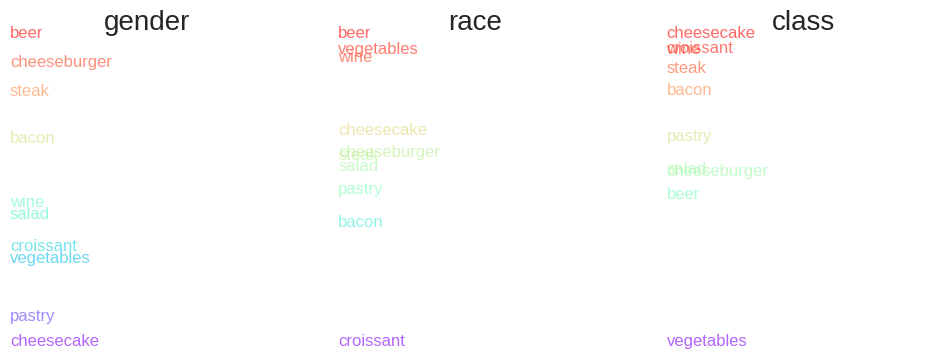

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

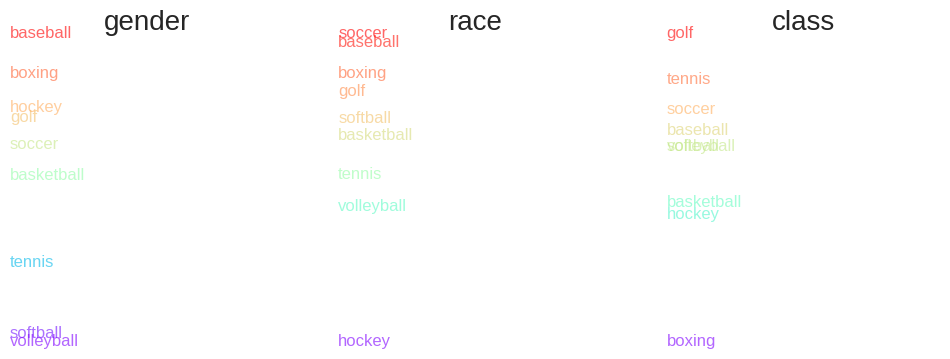

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## A game changer - Transformer Models

Attention based transformer models exploded onto the scene in 2016 and 2017, initially as a way to deal with machine translation - and soon took over and has become the standard for language modelling (but also images, and audio, and occasionally networks!).

We will use the popular Huggingface _Transformers_ package, that has access to an awesome suite of models and pipelines.

In this section, just to get a taste of the capabilities of these models, we will showcase a series of tasks and how to interpret and explain the results.

## Popular Tasks using Transformers

We will now use the popular Transformers package default 'pipelines' feature to explore common NLP tasks.

[Transformers Documentation](https://huggingface.co/transformers/)

[Transformers GitHub](https://github.com/huggingface/transformers)

The following sections of code are taken from the [Summary of Tasks](https://huggingface.co/transformers/task_summary.html) page in the Transformers documentation.

### Sequence Classification

Sequence classification is the task of classifying sequences according to a given number of classes. An example of
sequence classification is the GLUE dataset. If you would like to fine-tune a
model on a GLUE sequence classification task, you may leverage the [run_glue.py](https://github.com/huggingface/transformers/tree/master/examples/text-classification/run_glue.py) and
[run_pl_glue.py](https://github.com/huggingface/transformers/tree/master/examples/text-classification/run_pl_glue.py) or
[run_tf_glue.py](https://github.com/huggingface/transformers/tree/master/examples/text-classification/run_tf_glue.py) scripts.

Here is an example of using pipelines to do sentiment analysis: identifying if a sentence is positive or negative. It
leverages a fine-tuned model on sst2, which is a GLUE task.

This returns a label ("POSITIVE" or "NEGATIVE") alongside a score, as follows:

In [ ]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")

result = nlp("I hate you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

result = nlp("I love you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


label: NEGATIVE, with score: 0.9991
label: POSITIVE, with score: 0.9999


Here is an example of doing a sequence classification using a model to determine if two sequences are paraphrases of
each other. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Build a sequence from the two sentences, with the correct model-specific separators token type ids and attention
   masks (`PreTrainedTokenizer.encode` and `PreTrainedTokenizer.__call__` take
   care of this).
3. Pass this sequence through the model so that it is classified in one of the two available classes: 0 (not a
   paraphrase) and 1 (is a paraphrase).
4. Compute the softmax of the result to get probabilities over the classes.
5. Print the results.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")
classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt")
paraphrase_classification_logits = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits
paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]
# Should be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")
# Should not be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")

not paraphrase: 10%
is paraphrase: 90%
not paraphrase: 94%
is paraphrase: 6%


### Extractive Question Answering

Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a
model on a SQuAD task, you may leverage the [run_squad.py](https://github.com/huggingface/transformers/tree/master/examples/question-answering/run_squad.py) and
[run_tf_squad.py](https://github.com/huggingface/transformers/tree/master/examples/question-answering/run_tf_squad.py) scripts.


Here is an example of using pipelines to do question answering: extracting an answer from a text given a question. It
leverages a fine-tuned model on SQuAD.

In [ ]:
from transformers import pipeline
nlp = pipeline("question-answering")
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/question-answering/run_squad.py script.
"""

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


This returns an answer extracted from the text, a confidence score, alongside "start" and "end" values, which are the
positions of the extracted answer in the text.

In [ ]:
result = nlp(question="What is extractive question answering?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'the task of extracting an answer from a text given a question', score: 0.6226, start: 34, end: 95
Answer: 'SQuAD dataset', score: 0.5053, start: 147, end: 160


Here is an example of question answering using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define a text and a few questions.
3. Iterate over the questions and build a sequence from the text and the current question, with the correct
   model-specific separators token type ids and attention masks.
4. Pass this sequence through the model. This outputs a range of scores across the entire sequence of tokens (question and
   text), for both the start and end positions.
5. Compute the softmax of the result to get probabilities over the tokens.
6. Fetch the tokens from the identified start and stop values, convert those tokens to a string.
7. Print the results.

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    answer_start = torch.argmax(
        answer_start_scores
    )  # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer: {answer}")

Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: tensorflow 2. 0 and pytorch


### Language Modeling

Language modeling is the task of fitting a model to a corpus, which can be domain specific. All popular
transformer-based models are trained using a variant of language modeling, e.g., BERT with masked language modeling,
GPT-2/3 with causal language modeling.

Language modeling can be useful beyond pretraining as well, for example to shift the model distribution to be
domain-specific: using a language model trained over a very large corpus, and then fine-tuning it to a news dataset or
on scientific papers e.g. [LysandreJik/arxiv-nlp](https://huggingface.co/lysandre/arxiv-nlp).

#### Masked Language Modeling

Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to
fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the
right of the mask) and the left context (tokens on the left of the mask). Such a training creates a strong basis for
downstream tasks requiring bi-directional context, such as SQuAD (question answering, see [Lewis, Lui, Goyal et al.](https://arxiv.org/abs/1910.13461), part 4.2).

Here is an example of using pipelines to replace a mask from a sequence:

In [ ]:
from transformers import pipeline
nlp = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


This outputs the sequences with the mask filled, the confidence score, and the token id in the tokenizer vocabulary:

In [ ]:
from pprint import pprint
pprint(nlp(f"HuggingFace is creating a {nlp.tokenizer.mask_token} that the community uses to solve NLP tasks."))

[{'score': 0.17927546799182892,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.1134939193725586,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.052435602992773056,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.034935541450977325,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.028602560982108116,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


Here is an example of doing masked language modeling using a model and a tokenizer. The process as follows:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a DistilBERT model and
   loads it with the weights stored in the checkpoint.
2. Define a sequence with a masked token, placing the `tokenizer.mask_token` instead of a word.
3. Encode that sequence into a list of IDs and find the position of the masked token in that list.
4. Retrieve the predictions at the index of the mask token: this tensor has the same size as the vocabulary, and the
   values are the scores attributed to each token. The model gives higher scores to tokens it deems probable in that
   context.
5. Retrieve the top 5 tokens using the PyTorch `topk` or TensorFlow `top_k` methods.
6. Replace the mask token by the tokens and print the results

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelWithLMHead.from_pretrained("distilbert-base-cased")
sequence = f"Distilled models are smaller than the models they mimic. Using them instead of the large versions would help {tokenizer.mask_token} our carbon footprint."
input = tokenizer.encode(sequence, return_tensors="pt")
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]
token_logits = model(input).logits
mask_token_logits = token_logits[0, mask_token_index, :]
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.


This prints five sequences, with the top 5 tokens predicted by the model:

In [ ]:
for token in top_5_tokens:
    print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))

Distilled models are smaller than the models they mimic. Using them instead of the large versions would help reduce our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help increase our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help decrease our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help offset our carbon footprint.
Distilled models are smaller than the models they mimic. Using them instead of the large versions would help improve our carbon footprint.


### Text Generation

In text generation (**a.k.a** **open-ended text generation**) the goal is to create a coherent portion of text that is a
continuation from the given context. The following example shows how **GPT-2** can be used in pipelines to generate text.
As a default all models apply **Top-K** sampling when used in pipelines, as configured in their respective configurations
(see [gpt-2 config](https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json) for example).

In [ ]:
from transformers import pipeline
text_generator = pipeline("text-generation")
print(text_generator("As far as I am concerned, I will", max_length=50, do_sample=False))

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'As far as I am concerned, I will be the first to admit that I am not a fan of the idea of a "free market." I think that the idea of a free market is a bit of a stretch. I think that the idea'}]


Here, the model generates a random text with a total maximal length of **50** tokens from context **"As far as I am
concerned, I will"**. The default arguments of `PreTrainedModel.generate()` can be directly overridden in the
pipeline, as is shown above for the argument `max_length`.

Here is an example of text generation using `XLNet` and its tokenizer.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
model = AutoModelWithLMHead.from_pretrained("xlnet-base-cased")
tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")
# Padding text helps XLNet with short prompts - proposed by Aman Rusia in https://github.com/rusiaaman/XLNet-gen#methodology
PADDING_TEXT = """In 1991, the remains of Russian Tsar Nicholas II and his family
(except for Alexei and Maria) are discovered.
The voice of Nicholas's young son, Tsarevich Alexei Nikolaevich, narrates the
remainder of the story. 1883 Western Siberia,
a young Grigori Rasputin is asked by his father and a group of men to perform magic.
Rasputin has a vision and denounces one of the men as a horse thief. Although his
father initially slaps him for making such an accusation, Rasputin watches as the
man is chased outside and beaten. Twenty years later, Rasputin sees a vision of
the Virgin Mary, prompting him to become a priest. Rasputin quickly becomes famous,
with people, even a bishop, begging for his blessing. <eod> </s> <eos>"""
prompt = "Today the weather is really nice and I am planning on "
inputs = tokenizer.encode(PADDING_TEXT + prompt, add_special_tokens=False, return_tensors="pt")
prompt_length = len(tokenizer.decode(inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))
outputs = model.generate(inputs, max_length=250, do_sample=True, top_p=0.95, top_k=60)
generated = prompt + tokenizer.decode(outputs[0])[prompt_length:]

The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.


In [ ]:
print(generated)

Today the weather is really nice and I am planning on anning on heading out of the city and visit the "great city of Ojass." This is one of the areas that I can only say will be much better to do after 10 years in the city of Ojass than in the nearby city of Rio Grande.<eop> "The old city of Ojass" was built in 1876 by his


Text generation is currently possible with **GPT-2**, **OpenAi-GPT**, **CTRL**, **XLNet**, **Transfo-XL** and **Reformer** in
PyTorch and for most models in Tensorflow as well. As can be seen in the example above **XLNet** and **Transfo-XL** often
need to be padded to work well. GPT-2 is usually a good choice for **open-ended text generation** because it was trained
on millions of webpages with a causal language modeling objective.

For more information on how to apply different decoding strategies for text generation, please also refer to this text
generation blog post [here](https://huggingface.co/blog/how-to-generate).

### Named Entity Recognition

Named Entity Recognition (NER) is the task of classifying tokens according to a class, for example, identifying a token
as a person, an organisation or a location. An example of a named entity recognition dataset is the CoNLL-2003 dataset,
which is entirely based on that task. If you would like to fine-tune a model on an NER task, you may leverage the
[run_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_ner.py)
(PyTorch), [run_pl_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_pl_ner.py) (leveraging
pytorch-lightning) or the [run_tf_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_tf_ner.py) (TensorFlow)
scripts.

Here is an example of using pipelines to do named entity recognition, specifically, trying to identify tokens as
belonging to one of 9 classes:

- O, Outside of a named entity
- B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
- I-MIS, Miscellaneous entity
- B-PER, Beginning of a person's name right after another person's name
- I-PER, Person's name
- B-ORG, Beginning of an organisation right after another organisation
- I-ORG, Organisation
- B-LOC, Beginning of a location right after another location
- I-LOC, Location

It leverages a fine-tuned model on CoNLL-2003, fine-tuned by [@stefan-it](https://github.com/stefan-it) from [dbmdz](https://github.com/dbmdz).

In [ ]:
from transformers import pipeline
nlp = pipeline("ner")
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very"
           "close to the Manhattan Bridge which is visible from the window."

This outputs a list of all words that have been identified as one of the entities from the 9 classes defined above.
Here are the expected results:

In [ ]:
print(nlp(sequence))

[
    {'word': 'Hu', 'score': 0.9995632767677307, 'entity': 'I-ORG'},
    {'word': '##gging', 'score': 0.9915938973426819, 'entity': 'I-ORG'},
    {'word': 'Face', 'score': 0.9982671737670898, 'entity': 'I-ORG'},
    {'word': 'Inc', 'score': 0.9994403719902039, 'entity': 'I-ORG'},
    {'word': 'New', 'score': 0.9994346499443054, 'entity': 'I-LOC'},
    {'word': 'York', 'score': 0.9993270635604858, 'entity': 'I-LOC'},
    {'word': 'City', 'score': 0.9993864893913269, 'entity': 'I-LOC'},
    {'word': 'D', 'score': 0.9825621843338013, 'entity': 'I-LOC'},
    {'word': '##UM', 'score': 0.936983048915863, 'entity': 'I-LOC'},
    {'word': '##BO', 'score': 0.8987102508544922, 'entity': 'I-LOC'},
    {'word': 'Manhattan', 'score': 0.9758241176605225, 'entity': 'I-LOC'},
    {'word': 'Bridge', 'score': 0.990249514579773, 'entity': 'I-LOC'}
]

Note how the tokens of the sequence "Hugging Face" have been identified as an organisation, and "New York City",
"DUMBO" and "Manhattan Bridge" have been identified as locations.

Here is an example of doing named entity recognition, using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define the label list with which the model was trained on.
3. Define a sequence with known entities, such as "Hugging Face" as an organisation and "New York City" as a location.
4. Split words into tokens so that they can be mapped to predictions. We use a small hack by, first, completely
   encoding and decoding the sequence, so that we're left with a string that contains the special tokens.
5. Encode that sequence into IDs (special tokens are added automatically).
6. Retrieve the predictions by passing the input to the model and getting the first output. This results in a
   distribution over the 9 possible classes for each token. We take the argmax to retrieve the most likely class for
   each token.
7. Zip together each token with its prediction and print it.

In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
label_list = [
    "O",       # Outside of a named entity
    "B-MISC",  # Beginning of a miscellaneous entity right after another miscellaneous entity
    "I-MISC",  # Miscellaneous entity
    "B-PER",   # Beginning of a person's name right after another person's name
    "I-PER",   # Person's name
    "B-ORG",   # Beginning of an organisation right after another organisation
    "I-ORG",   # Organisation
    "B-LOC",   # Beginning of a location right after another location
    "I-LOC"    # Location
]
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very" \
           "close to the Manhattan Bridge."
# Bit of a hack to get the tokens with the special tokens
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")
outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

This outputs a list of each token mapped to its corresponding prediction. Differently from the pipeline, here every
token has a prediction as we didn't remove the "0"th class, which means that no particular entity was found on that
token. The following array should be the output:

In [ ]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

[('[CLS]', 'O'), ('Hu', 'I-ORG'), ('##gging', 'I-ORG'), ('Face', 'I-ORG'), ('Inc', 'I-ORG'), ('.', 'O'), ('is', 'O'), ('a', 'O'), ('company', 'O'), ('based', 'O'), ('in', 'O'), ('New', 'I-LOC'), ('York', 'I-LOC'), ('City', 'I-LOC'), ('.', 'O'), ('Its', 'O'), ('headquarters', 'O'), ('are', 'O'), ('in', 'O'), ('D', 'I-LOC'), ('##UM', 'I-LOC'), ('##BO', 'I-LOC'), (',', 'O'), ('therefore', 'O'), ('very', 'O'), ('##c', 'O'), ('##lose', 'O'), ('to', 'O'), ('the', 'O'), ('Manhattan', 'I-LOC'), ('Bridge', 'I-LOC'), ('.', 'O'), ('[SEP]', 'O')]

### Summarization

Summarization is the task of summarizing a document or an article into a shorter text. An example of a summarization dataset is the CNN / Daily Mail dataset, which consists of long news articles and was
created for the task of summarization. If you would like to fine-tune a model on a summarization task, various
approaches are described in this [document](https://github.com/huggingface/transformers/blob/master/examples/seq2seq/README.md).

Here is an example of using the pipelines to do summarization. It leverages a Bart model that was fine-tuned on the CNN
/ Daily Mail data set.

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

Because the summarization pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline for `max_length` and `min_length` as shown
below. This outputs the following summary:

In [ ]:
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]

Here is an example of doing summarization using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "summarize: ".
4. Use the `PreTrainedModel.generate()` method to generate the summary.

In this example we use Google`s T5 model. Even though it was pre-trained only on a multi-task mixed dataset (including
CNN / Daily Mail), it yields very good results.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")
# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

### Translation

We have already seen Translation examples early in this notebook. We will now use a different case with BERT.

An example of a translation dataset is the WMT English to German dataset, which has sentences in English as the input
data and the corresponding sentences in German as the target data. If you would like to fine-tune a model on a
translation task, various approaches are described in this [document](https://github.com/huggingface/transformers/blob/master/examples/seq2seq/README.md).

Here is an example of using the pipelines to do translation. It leverages a T5 model that was only pre-trained on a
multi-task mixture dataset (including WMT), yet, yielding impressive translation results.

In [ ]:
from transformers import pipeline
translator = pipeline("translation_en_to_de")
print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

[{'translation_text': 'Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.'}]

Because the translation pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline as is shown for `max_length` above.

Here is an example of doing translation using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "translate English to German: "
4. Use the `PreTrainedModel.generate()` method to perform the translation.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")
inputs = tokenizer.encode("translate English to German: Hugging Face is a technology company based in New York and Paris", return_tensors="pt")
outputs = model.generate(inputs, max_length=40, num_beams=4, early_stopping=True)

As with the pipeline example, we get the same translation:

In [ ]:
print(tokenizer.decode(outputs[0]))

Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.

### Interpreting and Explaining Transformers

SHAP ([SHapley Additive exPlanations](https://arxiv.org/abs/1705.07874)) is a game theoretic approach to explain model outputs based on [Shapley values](https://christophm.github.io/interpretable-ml-book/shapley.html). The intuition behind Shapley values is simple: It treats model inputs as a 'coalition' of features ('players') that collectively contribute to the output ('reward'). It then estimates the importance of any particular feature as the average marginal contribution of the feature across all combinatorial possibilities of 'coalitions' of features.

[SHAP](https://christophm.github.io/interpretable-ml-book/shap.html#shap) is a computational approach to estimating Shapley values by building a separate 'explanation' model to explain the output of any particular input. It is a model agnostic measure (it is not specific to any particular model architecture), making it a very handy analytical tool to better understand and compare the deep-learning-based models we build.

[Transformers Documentation](https://huggingface.co/transformers/)

[Transformers GitHub](https://github.com/huggingface/transformers)

[A great resource for interpretable ML by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/)

The following sections of code are based on the [Summary of Tasks](https://huggingface.co/transformers/task_summary.html) page in the Transformers documentation and [SHAP documentation.](https://shap.readthedocs.io/en/latest/index.html)

## State of the art today - Alpaca!

[NOTE - requires high RAM - might not run!]

The state of the art today (July 2024!) in language related tasks is  GPT-4, released by Open AI - however, it's behind doors only API access makes it not the most interesting to use, and open source models such as LLaMa and Alpaca reach similar levels of performance without being a complete black box.

The code below uses such a model to generate text.



The following cells contains minimal code for running [Alpaca-LoRA](https://github.com/tloen/alpaca-lora/) for demonstration purposes. Please check the repo for more details.

In [ ]:
!pip install bitsandbytes
!pip install -q datasets loralib sentencepiece
!pip install -q git+https://github.com/zphang/transformers@c3dc391
!pip install -q git+https://github.com/huggingface/peft.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from peft import PeftModel
from transformers import LLaMATokenizer, LLaMAForCausalLM, GenerationConfig

tokenizer = LLaMATokenizer.from_pretrained("decapoda-research/llama-7b-hf")
model = LLaMAForCausalLM.from_pretrained(
    "decapoda-research/llama-7b-hf",
    load_in_8bit=True,
    device_map="auto",
)
model = PeftModel.from_pretrained(model, "tloen/alpaca-lora-7b")


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.9/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.9/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/gpu-t4-s-1l2qksn3z7mq1 --tunnel_background_save_delay=10s --tunnel_periodic_background_save_frequency=30m0s --enable_output_coalescing=true --output_coalescing_required=true'), PosixPath('--listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=h

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
def generate_prompt(instruction, input=None):
    if input:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""

In [ ]:
generation_config = GenerationConfig(
    temperature=0.1,
    top_p=0.75,
    num_beams=4,
)

def evaluate(instruction, input=None):
    prompt = generate_prompt(instruction, input)
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"].cuda()
    generation_output = model.generate(
        input_ids=input_ids,
        generation_config=generation_config,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=256
    )
    for s in generation_output.sequences:
        output = tokenizer.decode(s)
        print("Response:", output.split("### Response:")[1].strip())

In [ ]:
evaluate(input("Instruction: "))

Instruction: Tell me about alpacas.
Response: Alpacas are a species of camelid native to South America. They are known for their soft, luxurious fleece, which is used to make clothing and other products. Alpacas are also raised for their meat and milk. They are generally docile and gentle, and are often kept as pets.


#	Network Learning

Follow along on the slides!

#	Image Learning

Follow along on the slides!

#	Audio-Visual Learning

Follow along on the slides!

#        PRACTICE: Embedding different modalities


In this section we will have a quick look at embedding techniques for networks/graphs, images, and audio.




## Network Data

This section walks us through dealing with different kinds of network data and how to create representations of them which we can later use for ML and DL algorithms. We will also walk through some basic analyses we can do on networks and network-derived statistics we can pass to different models.

**IMPORTANT**

Here are some resources for graph and network data:
- Open Graph Benchmark - https://github.com/snap-stanford/ogb
- SNAP - http://snap.stanford.edu/data/index.html

You can also find many social networks and graph datasets on popular graph based packages such as karateclub, StellarGraph, and PyTorch_geometric.

In [ ]:
import numpy as np
import networkx as nx

We mentioned that graphs are a way to represent connections between entities. From a mathematical perspective, this can be a set, one with information of the entities and the other with information on the edges (connections). It can also be a matrix or table, where each node is both a row and column, and a cell at the intersection of row and column indicates a connection between the two entities. Both of these naturally translate into a computational perspective. Let's try it out.

In [ ]:
G = nx.Graph()

So now we have an empty graph object. In networkx we can add nodes and edges easily, and also convert this into a numpy matrix representation.

In [ ]:
# adding one at a time
G.add_node(1)

In [ ]:
# adding a list
G.add_nodes_from([2, 4])

In [ ]:
G.nodes()

NodeView((1, 2, 4))

In [ ]:
# we can add edges / connection
G.add_edge(1, 2)

In [ ]:
# list of edges
G.add_edges_from([(1, 4), (2, 4)])

In [ ]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 4)])

In [ ]:
G[1][2]['weight'] = 2

In [ ]:
nx.to_numpy_array(G)

array([[0., 2., 1.],
       [2., 0., 1.],
       [1., 1., 0.]])

So we see how each of the nodes here are one per row and column, and the values in the matrix represent the weights. Networkx also lets us draw the matrix.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

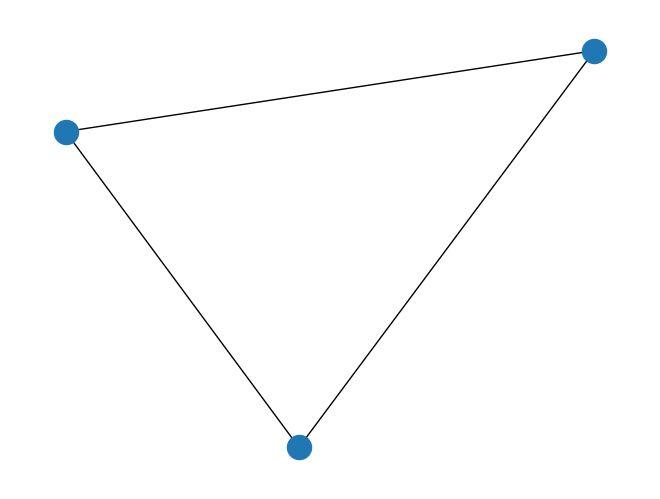

In [ ]:
nx.draw(G)

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats.
Another way to play with graphs is generate graphs from random processes, or load graphs previously created by others. Let's check both out!

In [ ]:
random_graph = nx.fast_gnp_random_graph(n=15, p=0.5)

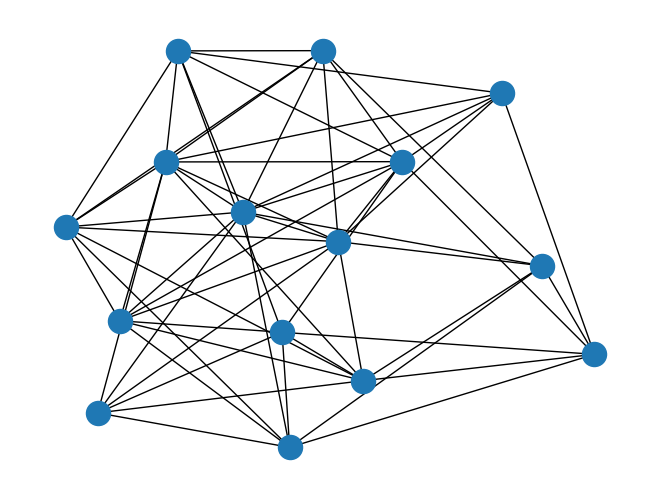

In [ ]:
nx.draw(random_graph)

There are also popular, small networks created through different methods of data collection - in this case, an anthropological study.

Zachary W. (1977). "An information flow model for conflict and fission in small groups". Journal of Anthropological Research, 33, 452-473.

In [ ]:
karate_club_graph = nx.karate_club_graph()

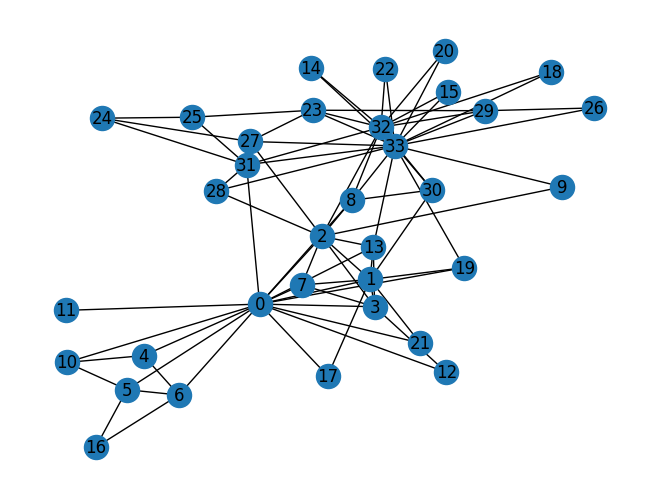

In [ ]:
nx.draw(karate_club_graph, with_labels=True)

In [ ]:
nx.to_numpy_array(karate_club_graph)

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

Common network-related tasks include link prediction, node classification, and the simulation of diffusions (e.g., of a disease or cultural norm) across the network. For these kinds of tasks, certain network features are useful. Networkx has a full suite of network related algorithms: https://networkx.org/documentation/stable/reference/algorithms/index.html

Let's see one such example with degree centrality--a measure of how central different nodes are as a function of the number of edges associated with it.

In [ ]:
nx.degree_centrality(karate_club_graph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Network science is a vast field deeply linked (pun intended) with data science. While we'll look at deep learning for graphs and tables in more detail on the dedicated chapter to it, let's whip up a few basic graph-based embeddings to see what they reveal!



In [ ]:
from networkx.algorithms import community

In [ ]:
communities_generator = community.girvan_newman(karate_club_graph)

In [ ]:
node_groups = tuple(sorted(c) for c in next(communities_generator))

In [ ]:
node_groups

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
# plot the communities
color_map = []
for node in karate_club_graph:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')

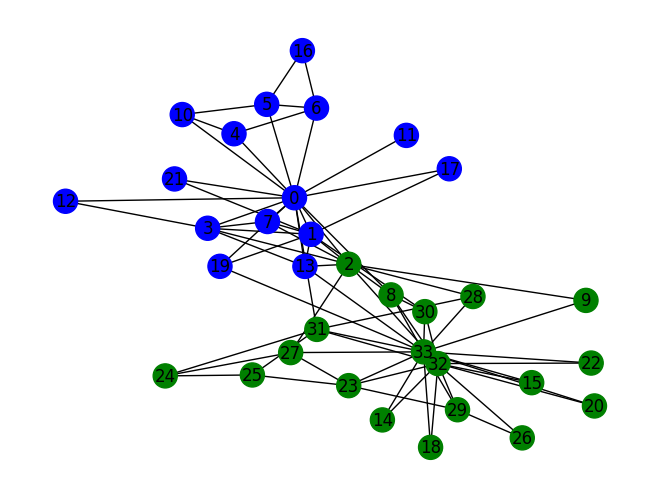

In [ ]:
nx.draw(karate_club_graph, node_color=color_map, with_labels=True)

We can see that the girvan newman method does a good job with the karate club network!

### Graph Based Shallow Embeddings


#### node2vec

[node2vec](https://arxiv.org/abs/1607.00653) (Grover and Lescovec, 2016) is one such popular embedding. Intuition: Find embedding of nodes to dimensions so that “similar” nodes in the graph are close together.

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [ ]:
model.wv.get_vector('0')

array([ 0.1182396 ,  0.01324156,  0.04520863,  0.00064205, -0.17045227,
       -0.04776596,  0.07775879, -0.00762691, -0.02773472, -0.10882691,
        0.21189411, -0.09482622,  0.12008659,  0.07573341, -0.01088032,
       -0.0359198 , -0.02741902,  0.08637068,  0.13035145,  0.37075666,
        0.05893692,  0.16490956,  0.16473731,  0.05930321, -0.0452752 ,
        0.09561282, -0.16311024, -0.15969007,  0.13377438, -0.09721829,
       -0.0250516 ,  0.05115118, -0.07267246, -0.12055691, -0.06336873,
        0.18600437,  0.13556463,  0.11869375,  0.09757247,  0.31141347,
        0.3149079 , -0.11353063,  0.07948153, -0.16399877, -0.07510002,
       -0.05488255, -0.10960013, -0.28210914, -0.06057264,  0.02903171,
        0.01648028,  0.28576463,  0.1249628 ,  0.14853473,  0.01683808,
        0.17759365,  0.30770478, -0.12204305,  0.20342223, -0.24441323,
        0.20603396, -0.04380981, -0.10451427,  0.14810729], dtype=float32)

In [ ]:
model.wv.most_similar('0')

[('17', 0.7504220604896545),
 ('21', 0.7497637271881104),
 ('1', 0.7345277070999146),
 ('13', 0.7334492206573486),
 ('11', 0.7285370230674744),
 ('10', 0.6970851421356201),
 ('6', 0.6646208763122559),
 ('7', 0.6629857420921326),
 ('5', 0.656663715839386),
 ('4', 0.6563038229942322)]

In [ ]:
model.wv.most_similar('33')

[('18', 0.8167985677719116),
 ('20', 0.8165839314460754),
 ('32', 0.8047218918800354),
 ('15', 0.8045405149459839),
 ('22', 0.8028334379196167),
 ('14', 0.7819647789001465),
 ('23', 0.7718536257743835),
 ('29', 0.7258113622665405),
 ('9', 0.7145042419433594),
 ('31', 0.6807401180267334)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured?

The node2vec package also includes edge embeddings, via the Hadamard (the best performing approach).

In [ ]:
from node2vec.edges import HadamardEmbedder

In [ ]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
edges_embs[('24', '25')]

array([ 1.30676106e-03, -3.79527541e-04,  1.78231388e-01, -2.21526599e-03,
       -1.45589225e-02,  1.86670851e-02,  1.25654750e-02, -1.82211248e-03,
        4.13832180e-02,  1.74490027e-02,  5.47422618e-02,  3.40259299e-02,
       -1.00845015e-02,  6.17704950e-02,  4.08613011e-02,  8.01882125e-04,
        3.06445174e-02, -8.46676808e-03,  1.89076029e-02,  7.37735257e-02,
        3.00738551e-02, -2.70515047e-02, -3.03413311e-04,  2.32199468e-02,
        6.59006163e-02,  9.83859412e-04,  9.35457423e-02,  9.27786157e-03,
        1.32371369e-03,  2.53927452e-03,  2.79846787e-03,  4.25690189e-02,
        1.66085750e-01,  1.50078041e-02,  1.36369318e-01, -1.73916586e-03,
        4.49906709e-03,  4.62270528e-02,  1.47731170e-01,  1.15285366e-04,
        6.71741320e-04,  1.97726861e-02,  6.46819025e-02, -1.71740737e-03,
        2.62194574e-02,  8.90887063e-03, -6.03211485e-03, -2.25236267e-03,
        3.60842459e-02,  1.84499808e-02,  9.27666854e-03,  2.77307462e-02,
        1.22875962e-02,  

In [ ]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 28729.76it/s]


In [ ]:
edges_kv.most_similar(str(('24', '25')))

[("('25', '25')", 0.9641217589378357),
 ("('25', '27')", 0.9270831942558289),
 ("('23', '25')", 0.9231255650520325),
 ("('24', '24')", 0.9217724204063416),
 ("('24', '27')", 0.9120882153511047),
 ("('25', '31')", 0.9048753380775452),
 ("('24', '31')", 0.8723192811012268),
 ("('25', '28')", 0.8692030906677246),
 ("('23', '24')", 0.8624370098114014),
 ("('23', '27')", 0.8601179122924805)]

These node and edge embeddings can be used for a wide range of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea of the different graph representations out there!

#### DeepWalk

Deepwalk is another popular shallow embedding method which uses random walks on a graph combined with word2vec to create embeddings. It was first described in [DeepWalk: Online Learning of Social Representations](https://arxiv.org/pdf/1403.6652.pdf). The GitHub repository with the code is: https://github.com/phanein/deepwalk, where you can run the code via command line.

In the cells below, we adapt the code from this GitHub repository (https://github.com/prateekjoshi565/DeepWalk) which creates it from scratch. You can also download the data in the repository, which is Wikipedia data.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

You can get the dataset from https://densitydesign.github.io/strumentalia-seealsology/

__Steps to download:__

a) Enter the following links:

https://en.wikipedia.org/wiki/Space_research

https://en.wikipedia.org/wiki/Space_Race

https://en.wikipedia.org/wiki/Space_exploration

b) Download the TSV file.

In [ ]:
df = pd.read_csv("/content/seealsology-data.tsv", sep = "\t")

In [ ]:
df.head()

,source,target,depth
0,space research,advances in space research,1
1,space research,benefits of space exploration,1
2,space research,committee on space research,1
3,space research,deep space exploration,1
4,space research,lists of space programs,1


In [ ]:
df.shape

(735, 3)

In [ ]:
# construct an undirected graph
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [ ]:
terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
         'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
         'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

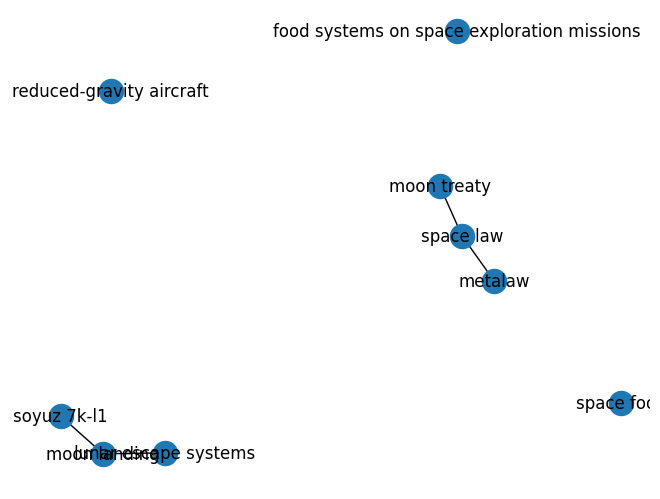

In [ ]:
nx.draw(G.subgraph(terms), with_labels = True)

In [ ]:
len(G) # number of nodes

526

In [ ]:
# function to generate random walk sequences of nodes
def get_randomwalk(node, path_length):

    random_walk = [node]

    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node

    return random_walk

In [ ]:
get_randomwalk('space exploration', 10)

['space exploration', 'atmospheric reentry']

In [ ]:
all_nodes = list(G.nodes())

random_walks = []

for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 526/526 [00:00<00:00, 12180.02it/s]


In [ ]:
# count of sequences
len(random_walks)

2630

In [ ]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

In [ ]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(174002, 231400)

In [ ]:
print(model)

Word2Vec<vocab=526, vector_size=100, alpha=0.03>


In [ ]:
# find top n similar nodes
model.wv.most_similar('lunar escape systems')

[('soyuz 7k-l1', 0.9969155192375183),
 ('robert goddard', 0.9746573567390442),
 ('moon landing', 0.9526660442352295),
 ('mars race', 0.939292848110199),
 ('space launch market competition', 0.9246053099632263),
 ('space race 2.0', 0.8993840217590332),
 ('moon shot', 0.8974931836128235),
 ('disclosure project', 0.8557240962982178),
 ('cold war playground equipment', 0.8444744348526001),
 ('todd b. hawley', 0.8351544141769409)]

In [ ]:
terms = ['lunar escape systems', 'soyuz 7k-l1', 'moon landing',
         'space food', 'food systems on space exploration missions', 'robert goddard',
         'space law', 'metalaw', 'moon treaty',
        'reduced-gravity aircraft']

In [ ]:
def plot_nodes(word_list):
    X = [model.wv[x] for x in word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

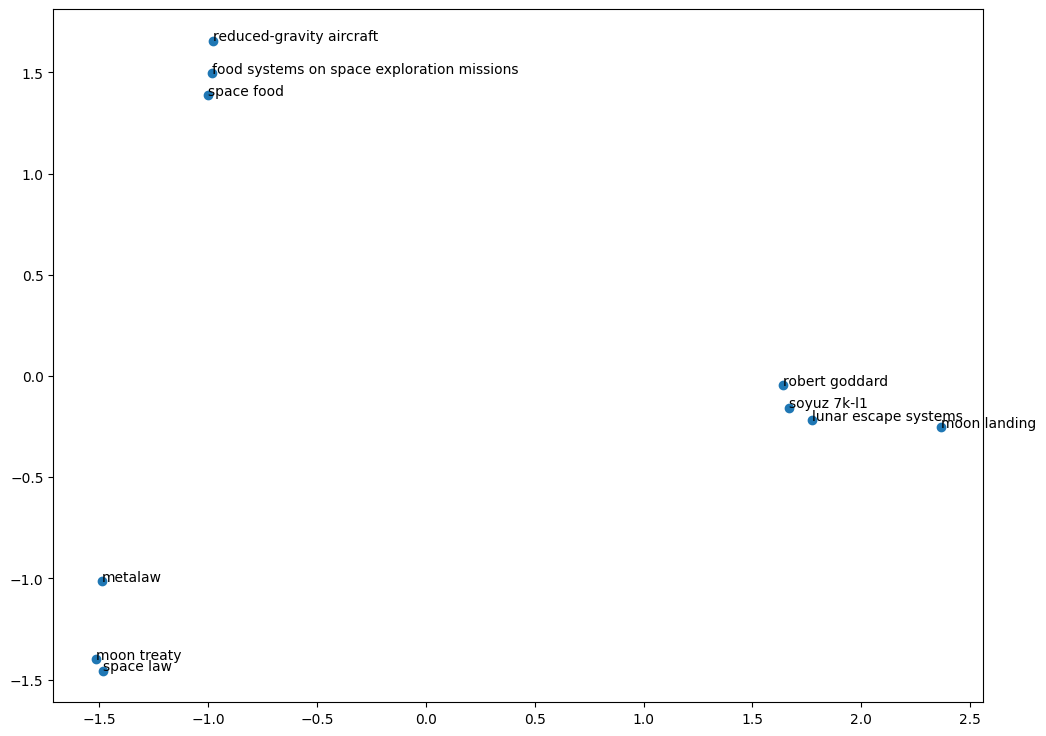

In [ ]:
plot_nodes(terms)

What you saw was a step by step way of implementing DeepWalk - we will soon see how we can implement it even easier using special packages.

## Images

### Images for Deep Learning

When we use images for deep learning, there are a few standard pre-processing steps that must be done. When we work with pre-trained models, we must be sure that our pre-processing matches how the images were pre-processed for the original training.

Let us load a few sample datasets from pytorch and see what kind of options we have. For vision related tasks, we use torchvision: https://pytorch.org/docs/stable/torchvision/index.html

In [ ]:
import torch
import torchvision
import torch.nn as nn

Each of the image pre-processing tasks are referred to as transformations. Some standard transformations are resizing, rescaling, and normalising the image with respect to the mean and standard deviation asssociated with the model. In PyTorch we use the transformer class to do these tasks, and can stack them up with the compose function.

https://pytorch.org/docs/stable/torchvision/transforms.html

Below is an example of transformations frequently applied to images. Here, this is part of a series of pre-processing steps for getting an image compatible with resnet-18, a popular 2018 Convolutional Neural Network used to train images.

In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
from PIL import Image


In [ ]:
image = Image.open('/content/coffee.jpg')

In [ ]:
transformed_image = transforms(image)

Let us now look at our transformed image as it is ready for deep learning models.

In [ ]:
transformed_image

tensor([[[-1.5699, -1.5357, -1.5014,  ..., -1.1075, -1.1932, -1.2274],
         [-1.5870, -1.5357, -1.5185,  ..., -1.1075, -1.1589, -1.2103],
         [-1.6213, -1.5699, -1.5528,  ..., -1.0733, -1.1418, -1.1589],
         ...,
         [-0.3198, -0.5424, -0.8678,  ..., -0.9020, -0.9363, -1.0219],
         [-0.3883, -0.7479, -1.1075,  ..., -0.8849, -0.9877, -1.0562],
         [-0.4568, -0.7822, -1.1075,  ..., -0.9192, -1.0048, -0.9363]],

        [[-1.4755, -1.4405, -1.4055,  ..., -1.0553, -1.1078, -1.1604],
         [-1.4930, -1.4580, -1.4230,  ..., -1.0203, -1.0903, -1.1253],
         [-1.5280, -1.4930, -1.4580,  ..., -0.9853, -1.0378, -1.0728],
         ...,
         [-0.2675, -0.4951, -0.8277,  ..., -0.9153, -0.9328, -1.0553],
         [-0.3375, -0.7052, -1.1078,  ..., -0.8627, -0.9503, -1.0203],
         [-0.3901, -0.7402, -1.0728,  ..., -0.9153, -0.9328, -0.8627]],

        [[-1.1770, -1.1247, -1.1073,  ..., -0.8458, -0.9156, -0.9678],
         [-1.1944, -1.1421, -1.1247,  ..., -0

In [ ]:
transformed_image.shape

torch.Size([3, 224, 224])

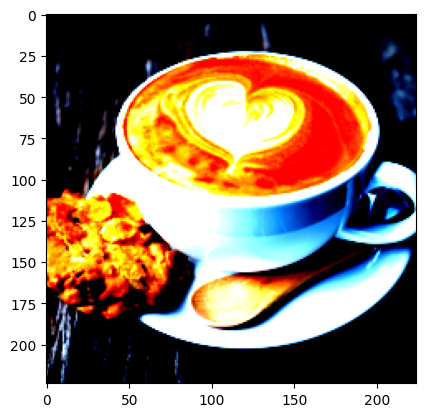

In [ ]:
# the permute function to put the channels as the last dimensions
plt.imshow(transformed_image.permute(1, 2, 0))

These transformations are applied to each of image for training and testing. As with text, for deep learning we don't often do much pre-processing beyond resizing/rescaling and normalising the image. The deep learning does the processing itself!

### Vector Representations and Image Embeddings

How do neural networks interpret images after being fed them? How do images pass through a deep neural model. Luckily for us with pre-trained models, we can perform this rapidly. Here, we use the final pre-trained layer, which is the avgpool layer. We use different layers depending on the kind of model.

In [ ]:
import torchvision.models as models


In [ ]:
# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
d = model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.2MB/s]


In [ ]:
def get_vector(image):
    # code adapted from the package:
    # https://github.com/christiansafka/img2vec/
    # Create a PyTorch tensor with the transformed image
    t_img = transforms(image)
    # Create a vector of zeros that will hold our feature vector
    # The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)

    # Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())                 # <-- flatten

    # Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # Run the model on our transformed image
    with torch.no_grad():                               # <-- no_grad context
        model(t_img.unsqueeze(0))                       # <-- unsqueeze
    # Detach our copy function from the layer
    h.remove()
    # Return the feature vector
    return my_embedding

In [ ]:
get_vector(image)

tensor([0.4299, 1.8710, 1.0346, 0.1405, 0.0442, 1.0362, 0.4764, 0.5914, 0.5707,
        0.2267, 0.7122, 0.5228, 0.6185, 0.9485, 2.4973, 0.9866, 1.5424, 1.1072,
        1.9934, 0.7407, 1.3699, 0.4057, 0.5227, 0.0899, 0.7789, 0.3996, 3.3543,
        0.6872, 2.8642, 0.1969, 0.6004, 0.1689, 0.2963, 0.0283, 0.5714, 0.5754,
        0.4140, 2.9323, 0.5014, 0.7204, 0.6060, 0.6856, 0.1829, 0.6925, 0.6160,
        1.5172, 0.0800, 0.6078, 1.1855, 1.5256, 1.2972, 1.8581, 1.4324, 0.3271,
        0.3950, 1.3074, 0.4593, 1.2559, 1.6396, 1.0889, 2.1081, 1.4466, 0.7169,
        1.0852, 0.1005, 1.3057, 0.0705, 1.9826, 0.1057, 0.5546, 0.6910, 0.8341,
        0.8122, 0.8358, 2.6021, 0.2852, 1.0763, 0.7705, 1.3402, 0.3608, 0.6497,
        0.0857, 0.4333, 0.8839, 2.0309, 0.4020, 1.1498, 3.5506, 1.0208, 1.2129,
        1.0590, 1.6761, 1.6741, 1.3483, 1.0783, 0.9576, 1.2630, 1.1050, 1.8831,
        0.2311, 1.8420, 0.8233, 0.4337, 3.6719, 0.1964, 0.9984, 1.0063, 1.0536,
        0.1484, 0.3918, 0.6284, 1.5560, 

Cool! So we just passed our transformed coffee image to the pre-trained resnet model and got a 512 dimensional image vector as result. resnet uses this vector to classify it. We can expect this image embedding to contain information of what are the coffee-like characteristics in the image.

The same code is wrapped up in the package img2vec_pytorch, and so far features a quick vector creation pipeline for resnet and AlexNet.

In [ ]:
!pip install img2vec_pytorch

In [ ]:
from img2vec_pytorch import Img2Vec


In [ ]:
img2vec = Img2Vec()

In [ ]:
coffee_vec = img2vec.get_vec(image)

In [ ]:
coffee_vec

array([2.9182476e-01, 1.9686359e+00, 3.1916082e-01, 3.9450938e-01,
       2.7497714e-02, 2.0828426e+00, 6.9931060e-01, 6.2086380e-01,
       5.3359824e-01, 1.8307430e-01, 1.2882401e+00, 4.2628759e-01,
       3.7329099e-01, 1.0964490e+00, 3.4483936e+00, 7.4043655e-01,
       9.2927378e-01, 1.0775266e+00, 2.1899576e+00, 9.6690297e-01,
       1.5157175e+00, 5.0960881e-01, 3.4974125e-01, 2.9351523e-02,
       6.7454255e-01, 1.5959458e-01, 2.7891889e+00, 3.7249196e-01,
       2.5662663e+00, 4.1416544e-02, 8.0690104e-01, 1.0199979e-01,
       4.9715891e-01, 1.6542017e-01, 7.4248093e-01, 7.2220433e-01,
       5.1334266e-02, 1.8023707e+00, 5.2764070e-01, 7.9250795e-01,
       5.3662521e-01, 1.1649367e+00, 5.9811682e-02, 6.6246253e-01,
       2.9571050e-01, 3.1002007e+00, 1.4628384e-01, 5.2591830e-01,
       1.7967750e+00, 1.8377599e+00, 1.8440735e+00, 2.4030597e+00,
       1.2904977e+00, 7.1314871e-01, 5.4305983e-01, 2.4127879e+00,
       4.7346178e-01, 1.6953785e+00, 1.4068395e+00, 9.4215667e

I uploaded my own pictures of a cat and dog, here. Feel free to do the same!

In [ ]:
cat_image = Image.open('/content/cat.jpeg')


In [ ]:
dog_image = Image.open('/content/dog.png')


These vectors are useful because we can then perform basic similarity checks using them.

In [ ]:
cat_vec = img2vec.get_vec(cat_image.convert('RGB'), tensor=True)

In [ ]:
dog_vec = img2vec.get_vec(dog_image.convert('RGB'), tensor=True)

In [ ]:
coffee_vec = img2vec.get_vec(image, tensor=True)

In [ ]:
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [ ]:
cos_sim = cos(cat_vec,
              dog_vec)

In [ ]:
cos_sim

tensor([[[0.5601]]])

In [ ]:
cos_sim = cos(coffee_vec,
              cat_vec)

In [ ]:
cos_sim

tensor([[[0.4419]]])

The cat looks more like the dog than the coffee cup. Whew!

## Audio

### Extracting Representations of Audio

### Audio Embeddings and Measurements

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.5 MB/s eta 0:00:00


In [ ]:
import soundfile as sf
import torch

In [ ]:
from transformers import Wav2Vec2Tokenizer, Wav2Vec2Model, Wav2Vec2Processor

In [ ]:
# load pretrained model
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import load_dataset

In [ ]:
def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

In [ ]:
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
ds = ds.map(map_to_array)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_dummy downloaded and prepared to /root/.cache/huggingface/datasets/patrickvonplaten___librispeech_asr_dummy/clean/2.1.0/f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc. Subsequent calls will reuse this data.


Map:   0%|          | 0/73 [00:00<?, ? examples/s]

In [ ]:
audio_input_0 = ds["speech"][0]

In [ ]:
input_values = processor(audio_input_0, return_tensors="pt").input_values  # Batch size 1

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
input_values

tensor([[-0.0048, -0.0018, -0.0135,  ...,  0.0077,  0.0089,  0.0083]])

In [ ]:
len(input_values.shape)

2

In [ ]:
hidden_states_asr = model(input_values).last_hidden_state

In [ ]:
hidden_states_asr.shape

torch.Size([1, 232, 768])

In [ ]:
# load audio
audio_input_1 = ds["speech"][1]

In [ ]:
input_values = processor(audio_input_1, return_tensors="pt").input_values  # Batch size 1

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
len(input_values[0])

104560

In [ ]:
hidden_states_asr_1 = model(input_values).last_hidden_state

In [ ]:
hidden_states_asr_1.shape

torch.Size([1, 326, 768])

What have we done here so far? We picked up two different wav files, both from the pre-trained corpus on speech recognition from librispeech.

We then processed them using the transformers wav2vec2 tokenizer, and then passed them through the model, which returned us the hidden states - we can see here that the hidden states are different shapes, with the size of the audio file influencing the shape of the hidden states. This means that the output size depends on the input, and we must do something to keep them all the same size (or use similar length files).

One quick way to get them ready to use for analysis is to create an "average" vector.

In [ ]:
avg_hidden_states_asr = torch.mean(hidden_states_asr[0], dim=0).detach().numpy()

In [ ]:
avg_hidden_states_asr.shape

(768,)

In [ ]:
avg_hidden_states_asr_1 = torch.mean(hidden_states_asr_1[0], dim=0).detach().numpy()

In [ ]:
avg_hidden_states_asr_1

array([ 3.71444528e-03, -6.40274538e-03, -6.56417906e-02, -6.90719858e-02,
        8.67746398e-02, -7.18982220e-02,  5.88281788e-02, -1.34401880e-02,
        2.32899070e-01, -1.60476327e-01, -5.66620678e-02,  2.88291788e-03,
        3.38360034e-02,  7.42642628e-03, -7.45438784e-03, -3.30995508e-02,
       -5.29886901e-01,  2.51589626e-01,  2.16309521e-02,  1.16075434e-01,
       -1.82566941e-01,  1.99696962e-02,  3.44061673e-01,  1.37311639e-02,
        1.40076593e-01,  3.66591178e-02, -6.37093365e-01, -5.34388353e-04,
        1.69985052e-02, -1.82681173e-01,  1.30918309e-01, -8.98198877e-03,
        2.70461314e-03, -6.06822260e-02, -1.81299865e-01,  1.10454336e-01,
       -3.96179296e-02, -1.07521281e-01, -1.13952249e-01,  1.07029632e-01,
       -1.18434049e-01, -2.29236066e-01, -1.86042622e-01,  1.92111418e-01,
       -2.89941728e-01,  9.91994888e-03, -1.70923844e-02,  1.91366356e-02,
        4.78113554e-02,  3.43355387e-02, -5.14359400e-02,  1.43605554e-02,
       -8.02851170e-02,  

Cool! Now that we have both down to an average vector, let's calculate the difference.

In [ ]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
  res = dot(a, b)/(norm(a)*norm(b))
  return res

In [ ]:
cos_sim(avg_hidden_states_asr_1, avg_hidden_states_asr)

0.96204424

So these embeddings are fairly different - but to be able to really tell how useful these embeddings are, we must compare with a third source. Let's whip up a quick function to get average embeddings.

In [ ]:
def average_audio_embedding(audio_path):
  audio_input, _ = sf.read(audio_path)
  input_values = processor(audio_input, return_tensors="pt").input_values  # Batch size 1
  input_values = torch.transpose(input_values, 0, 1)
  # print(input_values)
  # print(input_values.shape)
  hidden_states = model(input_values).last_hidden_state
  avg_hidden_state = torch.mean(hidden_states[0], dim=0).detach().numpy()
  return avg_hidden_state

I downloaded the 30 free country music samples from [stayonbeat.com](https://www.stayonbeat.com/2014/01/13/free-country-music-loops/), and uploaded a couple on to Colab to see what the embeddings look like. You are encouraged to do the same or use your own music.

In [ ]:
sample_path_1 = "/content/StayOnBeat.com_CountryLoops_1.wav"

In [ ]:
sample_1_embedding = average_audio_embedding(sample_path_1)

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
sample_path_2 = "/content/StayOnBeat.com_CountryLoops_2.wav"

In [ ]:
sample_2_embedding = average_audio_embedding(sample_path_2)

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
audio_vectors = {"asr_1":avg_hidden_states_asr_1, "asr":avg_hidden_states_asr, "country_sample_1":sample_1_embedding, "country_sample_2":sample_2_embedding}

In [ ]:
cos_sim(avg_hidden_states_asr_1, avg_hidden_states_asr)

0.96204424

In [ ]:
cos_sim(sample_1_embedding, avg_hidden_states_asr)

0.3646804

In [ ]:
cos_sim(sample_1_embedding, sample_2_embedding)

0.9916408

Observing the similarities, we see how the cosine similarities for the country music embeddings are far more similar than the speech vectors.

Something to note here is that wav2vec2 is focused on speech recognition, so it won't do the greatest job at embedding and understanding songs. However, there are other options to embed such files - it's up to you to find the best model for your task at hand!



##	Deep Reinforcement Learning Montage



##	Integrative Learning - Multi-modal, Complex and Complete Models


#	PRACTICE: Putting the Models together

Let's recap what we've coded up so far in this tutorial. We started with a basic single layer and double layer Keras and PyTorch Neural Network, trained to perform classification on handwritten digits. This model performed quite poorly, but we quickly saw that when we used a more complex convolutional network, we saw high levels of performance!

We then moved on to language models, which are now quite the fad (ChatGPT!), with a variety of models and pipelines, and some state of the art models. Such models can often be quite helpful with a variety of social scientific tasks, given how often social scientific data can be text (https://press.princeton.edu/books/hardcover/9780691207544/text-as-data).

But social scientific data can take many forms, and the next section saw simple out of the box methods to embed graphs and networks, images, and audio, with a small glimpse of how even similarity networks can be the foundation for more complex analysis.

In this section, we will see how all of this can come together, using a multi-modal text and image model, that allows us to search for images with natural language!


## Natural language image search with a Dual Encoder

We will be following the [neural language search tutorial](https://keras.io/examples/nlp/nl_image_search/
) from the Keras documentation, written by  [Khalid Salama](https://www.linkedin.com/in/khalid-salama-24403144/).

### Introduction

The example demonstrates how to build a dual encoder (also known as two-tower) neural network
model to search for images using natural language. The model is inspired by
the [CLIP](https://openai.com/blog/clip/)
approach, introduced by Alec Radford et al. The idea is to train a vision encoder and a text
encoder jointly to project the representation of images and their captions into the same embedding
space, such that the caption embeddings are located near the embeddings of the images they describe.

This example requires TensorFlow 2.4 or higher.
In addition, [TensorFlow Hub](https://www.tensorflow.org/hub)
and [TensorFlow Text](https://www.tensorflow.org/tutorials/tensorflow_text/intro)
are required for the BERT model, and [TensorFlow Addons](https://www.tensorflow.org/addons)
is required for the AdamW optimizer. These libraries can be installed using the
following command:

```python
pip install -q -U tensorflow-hub tensorflow-text tensorflow-addons
```

In [ ]:
! pip install -q -U tensorflow-hub tensorflow-text tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 28.3 MB/s eta 0:00:00


### Setup

In [ ]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

# Suppressing tf.hub warnings
tf.get_logger().setLevel("ERROR")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Prepare the data

We will use the [MS-COCO](https://cocodataset.org/#home) dataset to train our
dual encoder model. MS-COCO contains over 82,000 images, each of which has at least
5 different caption annotations. The dataset is usually used for
[image captioning](https://www.tensorflow.org/tutorials/text/image_captioning)
tasks, but we can repurpose the image-caption pairs to train our dual encoder
model for image search.

###
Download and extract the data

First, let's download the dataset, which consists of two compressed folders:
one with images, and the other—with associated image captions.
Note that the compressed images folder is 13GB in size.

In [ ]:
root_dir = "datasets"
annotations_dir = os.path.join(root_dir, "annotations")
images_dir = os.path.join(root_dir, "train2014")
tfrecords_dir = os.path.join(root_dir, "tfrecords")
annotation_file = os.path.join(annotations_dir, "captions_train2014.json")

# Download caption annotation files
if not os.path.exists(annotations_dir):
    annotation_zip = tf.keras.utils.get_file(
        "captions.zip",
        cache_dir=os.path.abspath("."),
        origin="http://images.cocodataset.org/annotations/annotations_trainval2014.zip",
        extract=True,
    )
    os.remove(annotation_zip)

# Download image files
if not os.path.exists(images_dir):
    image_zip = tf.keras.utils.get_file(
        "train2014.zip",
        cache_dir=os.path.abspath("."),
        origin="http://images.cocodataset.org/zips/train2014.zip",
        extract=True,
    )
    os.remove(image_zip)

print("Dataset is downloaded and extracted successfully.")

with open(annotation_file, "r") as f:
    annotations = json.load(f)["annotations"]

image_path_to_caption = collections.defaultdict(list)
for element in annotations:
    caption = f"{element['caption'].lower().rstrip('.')}"
    image_path = images_dir + "/COCO_train2014_" + "%012d.jpg" % (element["image_id"])
    image_path_to_caption[image_path].append(caption)

image_paths = list(image_path_to_caption.keys())
print(f"Number of images: {len(image_paths)}")

13510573713/13510573713 [==============================] - 321s 0us/step
Dataset is downloaded and extracted successfully.
Number of images: 82783


#### Process and save the data to TFRecord files

You can change the `sample_size` parameter to control many image-caption pairs
will be used for training the dual encoder model.
In this example we set `train_size` to 30,000 images,
which is about 35% of the dataset. We use 2 captions for each
image, thus producing 60,000 image-caption pairs. The size of the training set
affects the quality of the produced encoders, but more examples would lead to
longer training time.

In [ ]:
train_size = 30000
valid_size = 5000
captions_per_image = 2
images_per_file = 2000

train_image_paths = image_paths[:train_size]
num_train_files = int(np.ceil(train_size / images_per_file))
train_files_prefix = os.path.join(tfrecords_dir, "train")

valid_image_paths = image_paths[-valid_size:]
num_valid_files = int(np.ceil(valid_size / images_per_file))
valid_files_prefix = os.path.join(tfrecords_dir, "valid")

tf.io.gfile.makedirs(tfrecords_dir)


def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def create_example(image_path, caption):
    feature = {
        "caption": bytes_feature(caption.encode()),
        "raw_image": bytes_feature(tf.io.read_file(image_path).numpy()),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def write_tfrecords(file_name, image_paths):
    caption_list = []
    image_path_list = []
    for image_path in image_paths:
        captions = image_path_to_caption[image_path][:captions_per_image]
        caption_list.extend(captions)
        image_path_list.extend([image_path] * len(captions))

    with tf.io.TFRecordWriter(file_name) as writer:
        for example_idx in range(len(image_path_list)):
            example = create_example(
                image_path_list[example_idx], caption_list[example_idx]
            )
            writer.write(example.SerializeToString())
    return example_idx + 1


def write_data(image_paths, num_files, files_prefix):
    example_counter = 0
    for file_idx in tqdm(range(num_files)):
        file_name = files_prefix + "-%02d.tfrecord" % (file_idx)
        start_idx = images_per_file * file_idx
        end_idx = start_idx + images_per_file
        example_counter += write_tfrecords(file_name, image_paths[start_idx:end_idx])
    return example_counter


train_example_count = write_data(train_image_paths, num_train_files, train_files_prefix)
print(f"{train_example_count} training examples were written to tfrecord files.")

valid_example_count = write_data(valid_image_paths, num_valid_files, valid_files_prefix)
print(f"{valid_example_count} evaluation examples were written to tfrecord files.")

100%|██████████| 15/15 [04:34<00:00, 18.33s/it]


60000 training examples were written to tfrecord files.


100%|██████████| 3/3 [00:45<00:00, 15.07s/it]

10000 evaluation examples were written to tfrecord files.


#### Create `tf.data.Dataset` for training and evaluation

In [ ]:

feature_description = {
    "caption": tf.io.FixedLenFeature([], tf.string),
    "raw_image": tf.io.FixedLenFeature([], tf.string),
}


def read_example(example):
    features = tf.io.parse_single_example(example, feature_description)
    raw_image = features.pop("raw_image")
    features["image"] = tf.image.resize(
        tf.image.decode_jpeg(raw_image, channels=3), size=(299, 299)
    )
    return features


def get_dataset(file_pattern, batch_size):

    return (
        tf.data.TFRecordDataset(tf.data.Dataset.list_files(file_pattern))
        .map(
            read_example,
            num_parallel_calls=tf.data.experimental.AUTOTUNE,
            deterministic=False,
        )
        .shuffle(batch_size * 10)
        .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        .batch(batch_size)
    )


### Implement the projection head

The projection head is used to transform the image and the text embeddings to
the same embedding space with the same dimensionality.

In [ ]:

def project_embeddings(
    embeddings, num_projection_layers, projection_dims, dropout_rate
):
    projected_embeddings = layers.Dense(units=projection_dims)(embeddings)
    for _ in range(num_projection_layers):
        x = tf.nn.gelu(projected_embeddings)
        x = layers.Dense(projection_dims)(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Add()([projected_embeddings, x])
        projected_embeddings = layers.LayerNormalization()(x)
    return projected_embeddings


### Implement the vision encoder

In this example, we use [Xception](https://keras.io/api/applications/xception/)
from [Keras Applications](https://keras.io/api/applications/) as the base for the
vision encoder.

In [ ]:

def create_vision_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the pre-trained Xception model to be used as the base encoder.
    xception = keras.applications.Xception(
        include_top=False, weights="imagenet", pooling="avg"
    )
    # Set the trainability of the base encoder.
    for layer in xception.layers:
        layer.trainable = trainable
    # Receive the images as inputs.
    inputs = layers.Input(shape=(299, 299, 3), name="image_input")
    # Preprocess the input image.
    xception_input = tf.keras.applications.xception.preprocess_input(inputs)
    # Generate the embeddings for the images using the xception model.
    embeddings = xception(xception_input)
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the vision encoder model.
    return keras.Model(inputs, outputs, name="vision_encoder")


### Implement the text encoder

We use [BERT](https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1)
from [TensorFlow Hub](https://tfhub.dev) as the text encoder

In [ ]:

def create_text_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the BERT preprocessing module.
    preprocess = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2",
        name="text_preprocessing",
    )
    # Load the pre-trained BERT model to be used as the base encoder.
    bert = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1",
        "bert",
    )
    # Set the trainability of the base encoder.
    bert.trainable = trainable
    # Receive the text as inputs.
    inputs = layers.Input(shape=(), dtype=tf.string, name="text_input")
    # Preprocess the text.
    bert_inputs = preprocess(inputs)
    # Generate embeddings for the preprocessed text using the BERT model.
    embeddings = bert(bert_inputs)["pooled_output"]
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the text encoder model.
    return keras.Model(inputs, outputs, name="text_encoder")


### Implement the dual encoder

To calculate the loss, we compute the pairwise dot-product similarity between
each `caption_i` and `images_j` in the batch as the predictions.
The target similarity between `caption_i`  and `image_j` is computed as
the average of the (dot-product similarity between `caption_i` and `caption_j`)
and (the dot-product similarity between `image_i` and `image_j`).
Then, we use crossentropy to compute the loss between the targets and the predictions.

In [ ]:

class DualEncoder(keras.Model):
    def __init__(self, text_encoder, image_encoder, temperature=1.0, **kwargs):
        super(DualEncoder, self).__init__(**kwargs)
        self.text_encoder = text_encoder
        self.image_encoder = image_encoder
        self.temperature = temperature
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def call(self, features, training=False):
        # Place each encoder on a separate GPU (if available).
        # TF will fallback on available devices if there are fewer than 2 GPUs.
        with tf.device("/gpu:0"):
            # Get the embeddings for the captions.
            caption_embeddings = text_encoder(features["caption"], training=training)
        with tf.device("/gpu:1"):
            # Get the embeddings for the images.
            image_embeddings = vision_encoder(features["image"], training=training)
        return caption_embeddings, image_embeddings

    def compute_loss(self, caption_embeddings, image_embeddings):
        # logits[i][j] is the dot_similarity(caption_i, image_j).
        logits = (
            tf.matmul(caption_embeddings, image_embeddings, transpose_b=True)
            / self.temperature
        )
        # images_similarity[i][j] is the dot_similarity(image_i, image_j).
        images_similarity = tf.matmul(
            image_embeddings, image_embeddings, transpose_b=True
        )
        # captions_similarity[i][j] is the dot_similarity(caption_i, caption_j).
        captions_similarity = tf.matmul(
            caption_embeddings, caption_embeddings, transpose_b=True
        )
        # targets[i][j] = avarage dot_similarity(caption_i, caption_j) and dot_similarity(image_i, image_j).
        targets = keras.activations.softmax(
            (captions_similarity + images_similarity) / (2 * self.temperature)
        )
        # Compute the loss for the captions using crossentropy
        captions_loss = keras.losses.categorical_crossentropy(
            y_true=targets, y_pred=logits, from_logits=True
        )
        # Compute the loss for the images using crossentropy
        images_loss = keras.losses.categorical_crossentropy(
            y_true=tf.transpose(targets), y_pred=tf.transpose(logits), from_logits=True
        )
        # Return the mean of the loss over the batch.
        return (captions_loss + images_loss) / 2

    def train_step(self, features):
        with tf.GradientTape() as tape:
            # Forward pass
            caption_embeddings, image_embeddings = self(features, training=True)
            loss = self.compute_loss(caption_embeddings, image_embeddings)
        # Backward pass
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        # Monitor loss
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, features):
        caption_embeddings, image_embeddings = self(features, training=False)
        loss = self.compute_loss(caption_embeddings, image_embeddings)
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}


### Train the dual encoder model

In this experiment, we freeze the base encoders for text and images, and make only
the projection head trainable.

In [ ]:
num_epochs = 5  # In practice, train for at least 30 epochs
batch_size = 256

vision_encoder = create_vision_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
text_encoder = create_text_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
dual_encoder = DualEncoder(text_encoder, vision_encoder, temperature=0.05)
dual_encoder.compile(
    optimizer=tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
)

Note that training the model with 60,000 image-caption pairs, with a batch size of 256,
takes around 12 minutes per epoch using a V100 GPU accelerator. If 2 GPUs are available,
the epoch takes around 8 minutes.

In [ ]:
print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")
print(f"Number of examples (caption-image pairs): {train_example_count}")
print(f"Batch size: {batch_size}")
print(f"Steps per epoch: {int(np.ceil(train_example_count / batch_size))}")
train_dataset = get_dataset(os.path.join(tfrecords_dir, "train-*.tfrecord"), batch_size)
valid_dataset = get_dataset(os.path.join(tfrecords_dir, "valid-*.tfrecord"), batch_size)
# Create a learning rate scheduler callback.
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3
)
# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
history = dual_encoder.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=[reduce_lr, early_stopping],
)
print("Training completed. Saving vision and text encoders...")
vision_encoder.save("vision_encoder")
text_encoder.save("text_encoder")
print("Models are saved.")

Plotting the training loss:

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()

### Search for images using natural language queries

We can then retrieve images corresponding to natural language queries via
the following steps:

1. Generate embeddings for the images by feeding them into the `vision_encoder`.
2. Feed the natural language query to the `text_encoder` to generate a query embedding.
3. Compute the similarity between the query embedding and the image embeddings
in the index to retrieve the indices of the top matches.
4. Look up the paths of the top matching images to display them.

Note that, after training the `dual encoder`, only the fine-tuned `vision_encoder`
and `text_encoder` models will be used, while the `dual_encoder` model will be discarded.

#### Generate embeddings for the images

We load the images and feed them into the `vision_encoder` to generate their embeddings.
In large scale systems, this step is performed using a parallel data processing framework,
such as [Apache Spark](https://spark.apache.org) or [Apache Beam](https://beam.apache.org).
Generating the image embeddings may take several minutes.

In [ ]:
print("Loading vision and text encoders...")
vision_encoder = keras.models.load_model("vision_encoder")
text_encoder = keras.models.load_model("text_encoder")
print("Models are loaded.")


def read_image(image_path):
    image_array = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    return tf.image.resize(image_array, (299, 299))


print(f"Generating embeddings for {len(image_paths)} images...")
image_embeddings = vision_encoder.predict(
    tf.data.Dataset.from_tensor_slices(image_paths).map(read_image).batch(batch_size),
    verbose=1,
)
print(f"Image embeddings shape: {image_embeddings.shape}.")

#### Retrieve relevant images

In this example, we use exact matching by computing the dot product similarity
between the input query embedding and the image embeddings, and retrieve the top k
matches. However, *approximate* similarity matching, using frameworks like
[ScaNN](https://github.com/google-research/google-research/tree/master/scann),
[Annoy](https://github.com/spotify/annoy), or [Faiss](https://github.com/facebookresearch/faiss)
is preferred in real-time use cases to scale with a large number of images.

In [ ]:

def find_matches(image_embeddings, queries, k=9, normalize=True):
    # Get the embedding for the query.
    query_embedding = text_encoder(tf.convert_to_tensor(queries))
    # Normalize the query and the image embeddings.
    if normalize:
        image_embeddings = tf.math.l2_normalize(image_embeddings, axis=1)
        query_embedding = tf.math.l2_normalize(query_embedding, axis=1)
    # Compute the dot product between the query and the image embeddings.
    dot_similarity = tf.matmul(query_embedding, image_embeddings, transpose_b=True)
    # Retrieve top k indices.
    results = tf.math.top_k(dot_similarity, k).indices.numpy()
    # Return matching image paths.
    return [[image_paths[idx] for idx in indices] for indices in results]


Set the `query` variable to the type of images you want to search for.
Try things like: 'a plate of healthy food',
'a woman wearing a hat is walking down a sidewalk',
'a bird sits near to the water', or 'wild animals are standing in a field'.

In [ ]:
query = "a family standing next to the ocean on a sandy beach with a surf board"
matches = find_matches(image_embeddings, [query], normalize=True)[0]

plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(matches[i]))
    plt.axis("off")


### Evaluate the retrieval quality

To evaluate the dual encoder model, we use the captions as queries.
We use the out-of-training-sample images and captions to evaluate the retrieval quality,
using top k accuracy. A true prediction is counted if, for a given caption, its associated image
is retrieved within the top k matches.

In [ ]:

def compute_top_k_accuracy(image_paths, k=100):
    hits = 0
    num_batches = int(np.ceil(len(image_paths) / batch_size))
    for idx in tqdm(range(num_batches)):
        start_idx = idx * batch_size
        end_idx = start_idx + batch_size
        current_image_paths = image_paths[start_idx:end_idx]
        queries = [
            image_path_to_caption[image_path][0] for image_path in current_image_paths
        ]
        result = find_matches(image_embeddings, queries, k)
        hits += sum(
            [
                image_path in matches
                for (image_path, matches) in list(zip(current_image_paths, result))
            ]
        )

    return hits / len(image_paths)


print("Scoring training data...")
train_accuracy = compute_top_k_accuracy(train_image_paths)
print(f"Train accuracy: {round(train_accuracy * 100, 3)}%")

print("Scoring evaluation data...")
eval_accuracy = compute_top_k_accuracy(image_paths[train_size:])
print(f"Eval accuracy: {round(eval_accuracy * 100, 3)}%")


### Final remarks

You can obtain better results by increasing the size of the training sample,
train for more  epochs, explore other base encoders for images and text,
set the base encoders to be trainable, and tune the hyperparameters,
especially the `temperature` for the softmax in the loss computation.

# 	You in the Loop

Follow along on the slides!